In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
dataset = pd.concat([train, test], axis = 0)

In [ ]:
dataset.shape

(2919, 81)

In [ ]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


# Exploratory Data Analysis

# Missing Values

In [ ]:
features_with_na = [features for features in dataset.columns if dataset[features].isnull().sum() > 1]

In [ ]:
for features in features_with_na:
  print(features,np.round(dataset[features].isnull().mean() * 100,3),'% missing values')

MSZoning 0.137 % missing values
LotFrontage 16.65 % missing values
Alley 93.217 % missing values
Utilities 0.069 % missing values
MasVnrType 0.822 % missing values
MasVnrArea 0.788 % missing values
BsmtQual 2.775 % missing values
BsmtCond 2.809 % missing values
BsmtExposure 2.809 % missing values
BsmtFinType1 2.706 % missing values
BsmtFinType2 2.741 % missing values
BsmtFullBath 0.069 % missing values
BsmtHalfBath 0.069 % missing values
Functional 0.069 % missing values
FireplaceQu 48.647 % missing values
GarageType 5.379 % missing values
GarageYrBlt 5.447 % missing values
GarageFinish 5.447 % missing values
GarageQual 5.447 % missing values
GarageCond 5.447 % missing values
PoolQC 99.657 % missing values
Fence 80.439 % missing values
MiscFeature 96.403 % missing values
SalePrice 49.983 % missing values


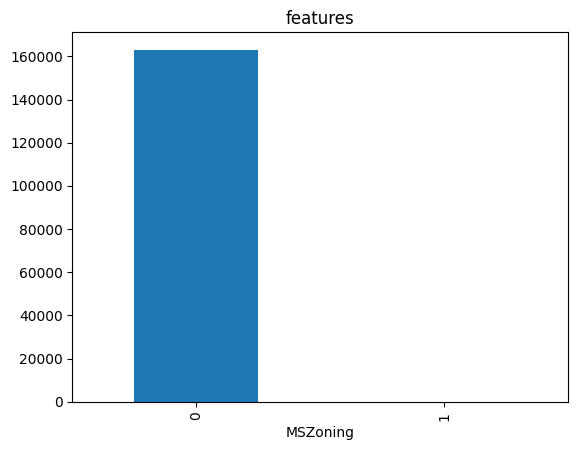

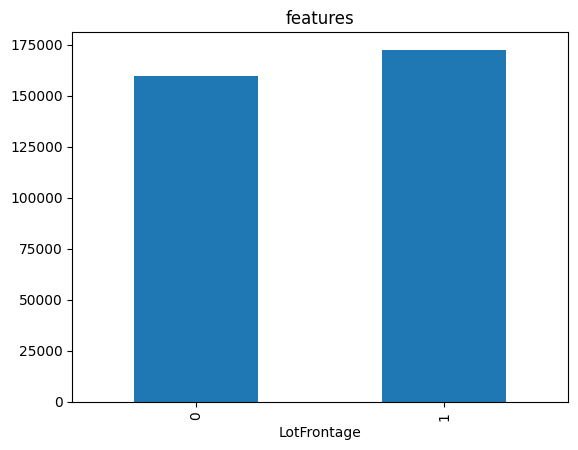

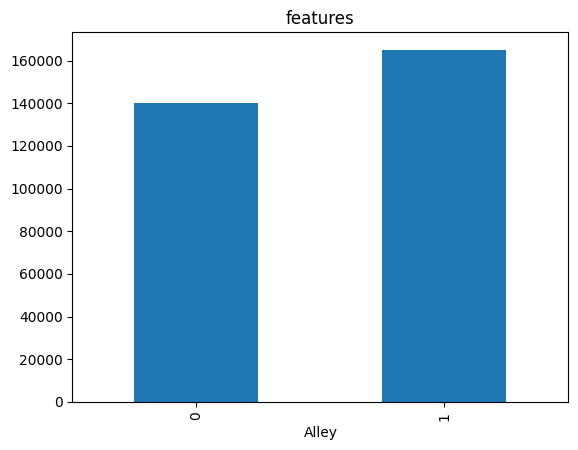

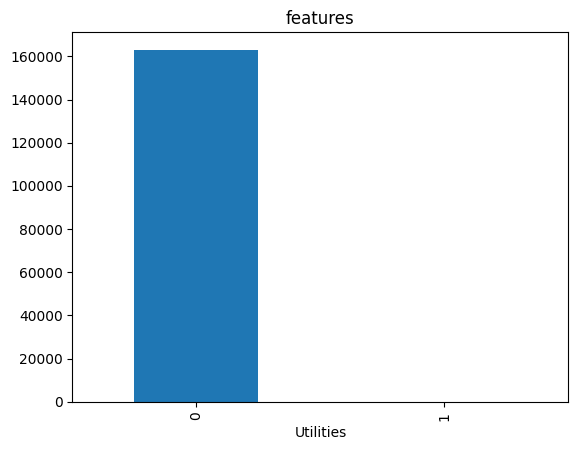

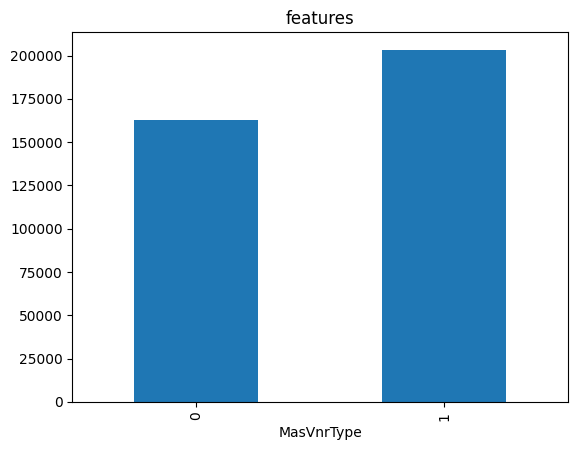

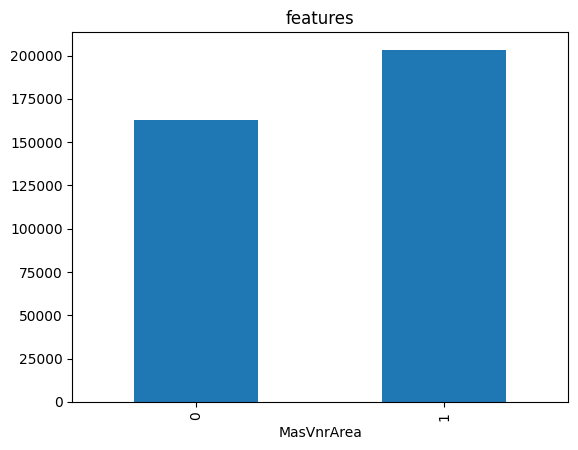

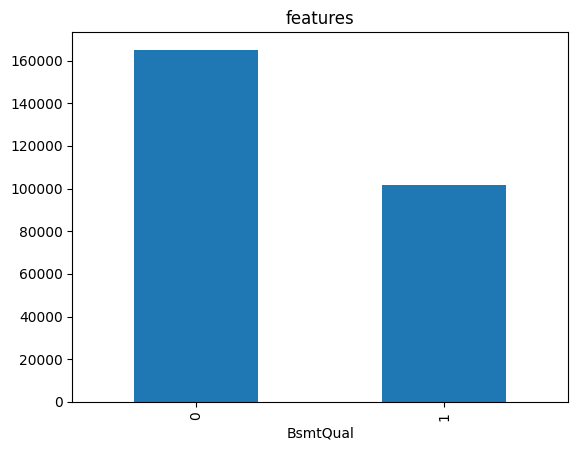

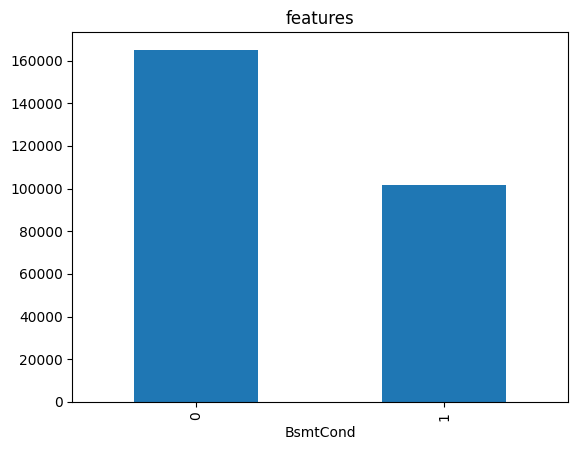

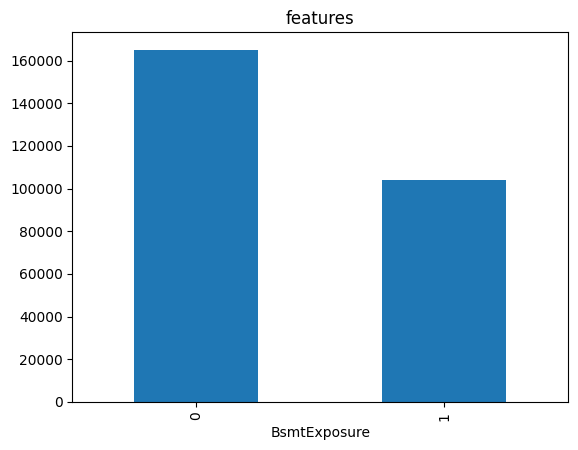

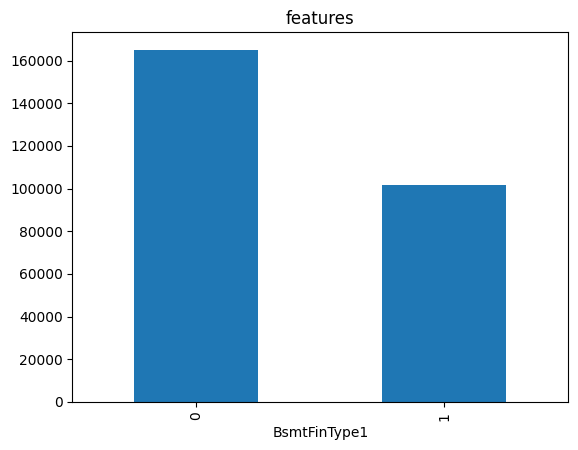

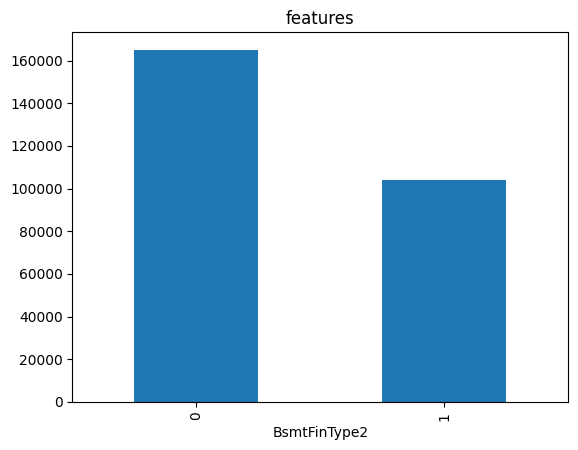

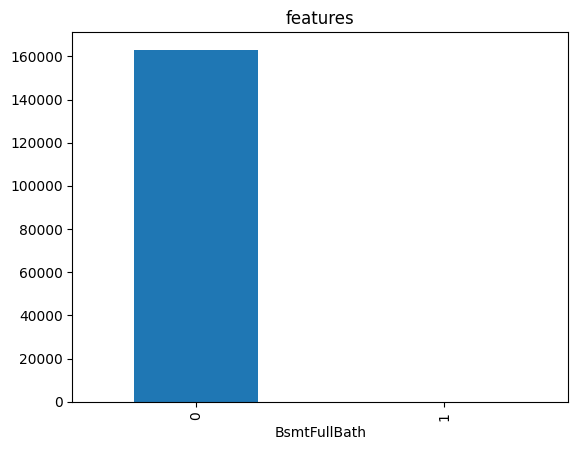

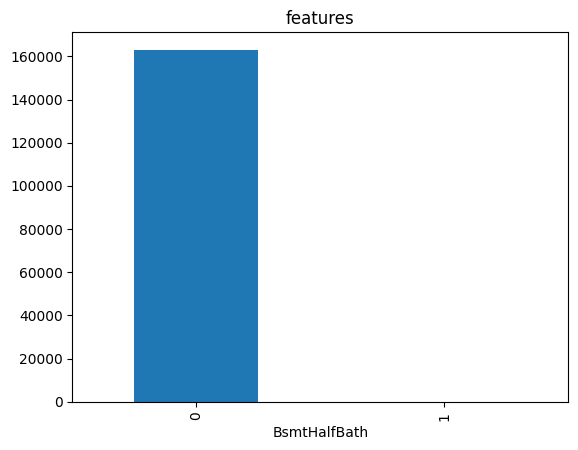

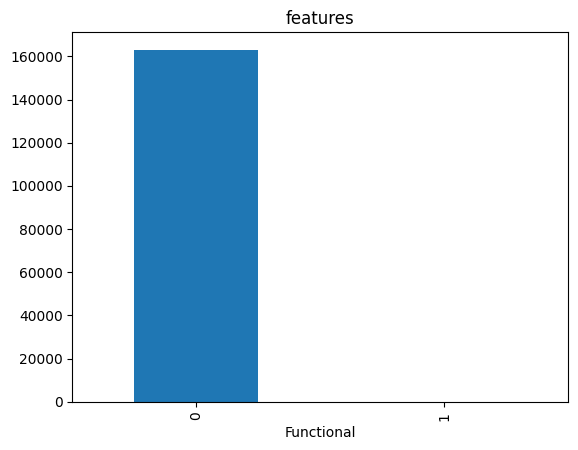

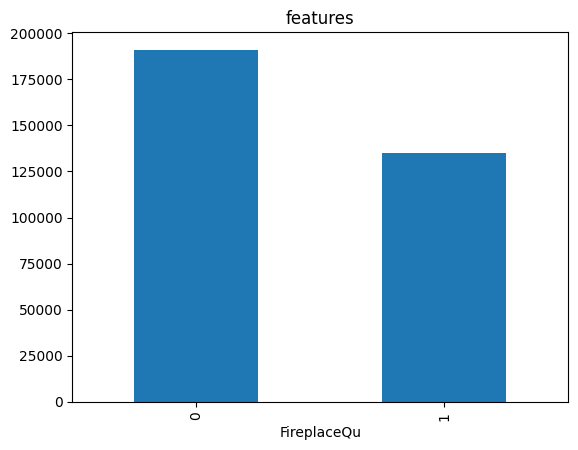

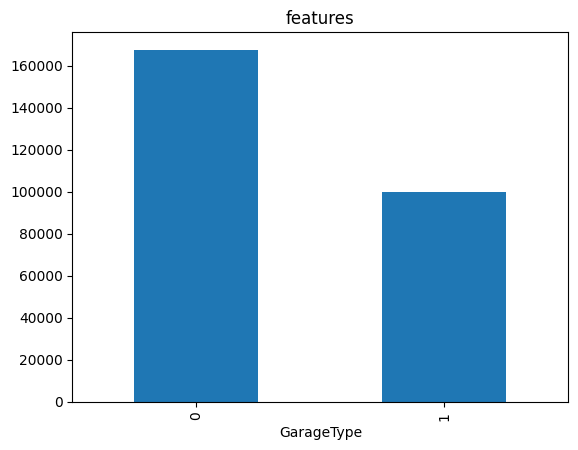

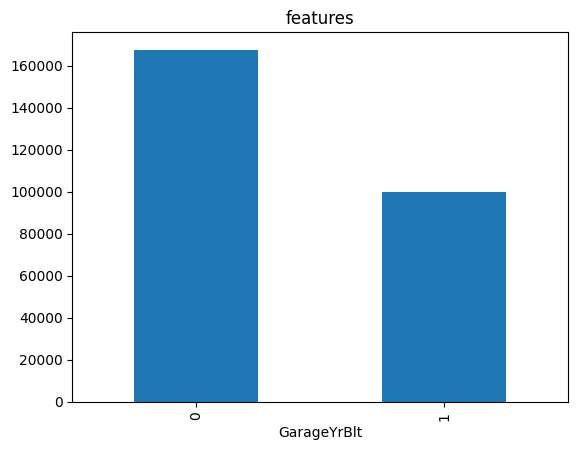

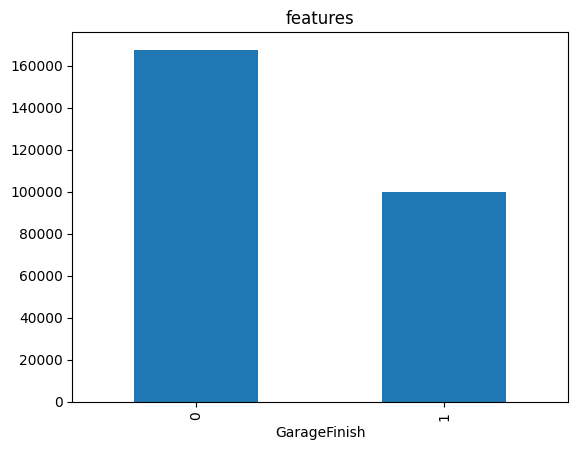

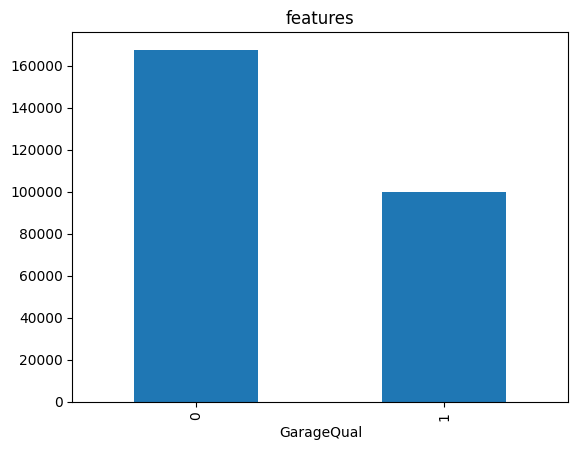

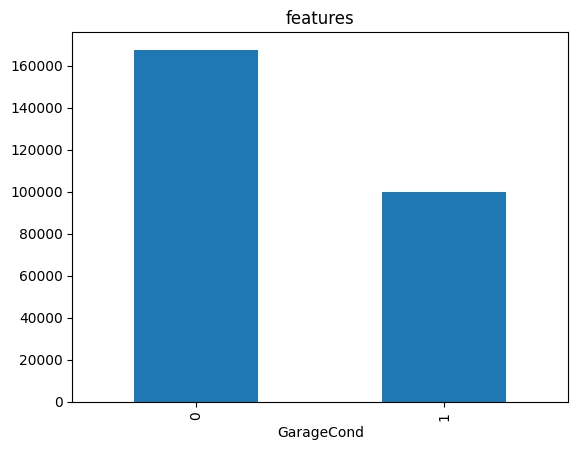

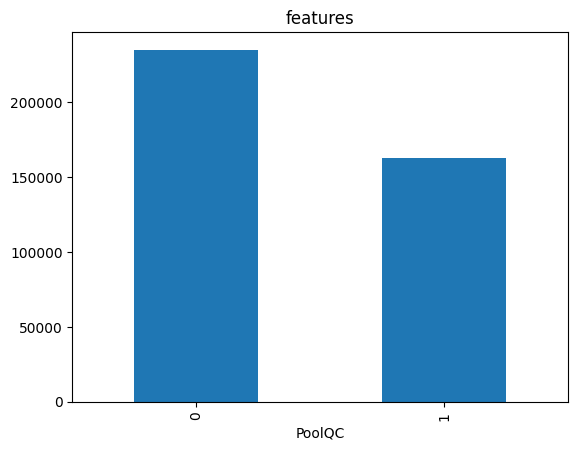

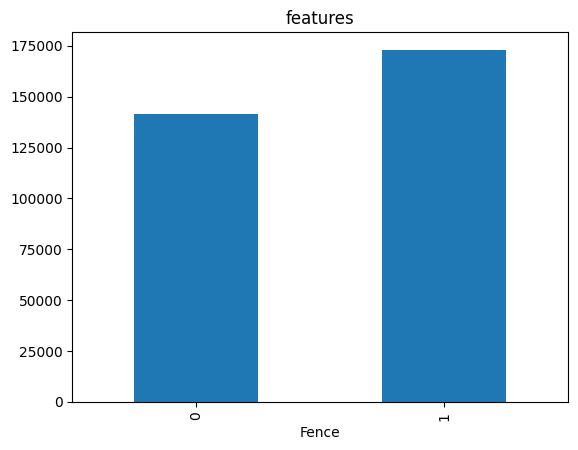

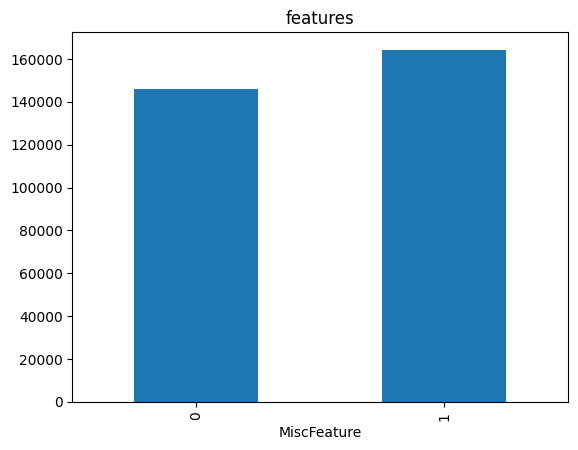

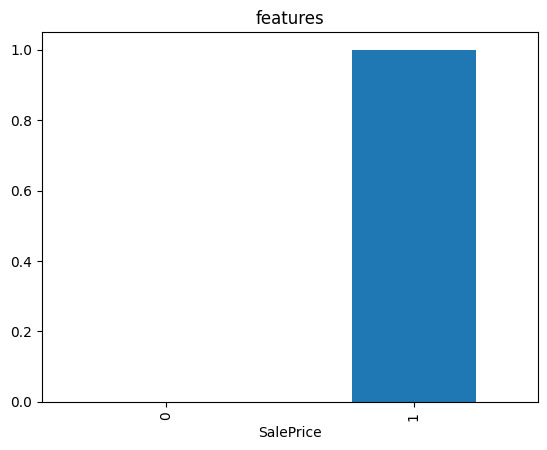

In [ ]:
for features in features_with_na:
  data = dataset.copy()
  data[features] = np.where(data[features].isnull(),1,0)

  data.groupby(features)['SalePrice'].median().plot.bar()
  plt.title('features')
  plt.show()

In [ ]:
#check the columns which are not object
numerical_features = [features for features in dataset if dataset[features].dtype != 'O']
print('number of numerical features: ',len(numerical_features))
dataset[numerical_features].head()

number of numerical features:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,192,84,0,0,0,0,0,12,2008,250000.0


In [ ]:
#getting the year features
year_features = [features for features in numerical_features if 'Yr' in features or 'Year' in features]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

<Axes: xlabel='YrSold'>

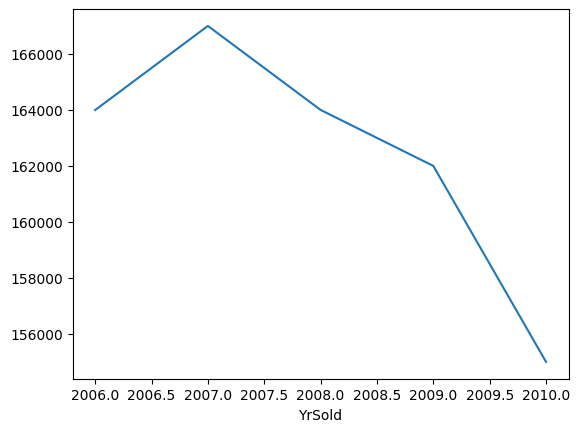

In [ ]:
dataset.groupby('YrSold')['SalePrice'].median().plot()

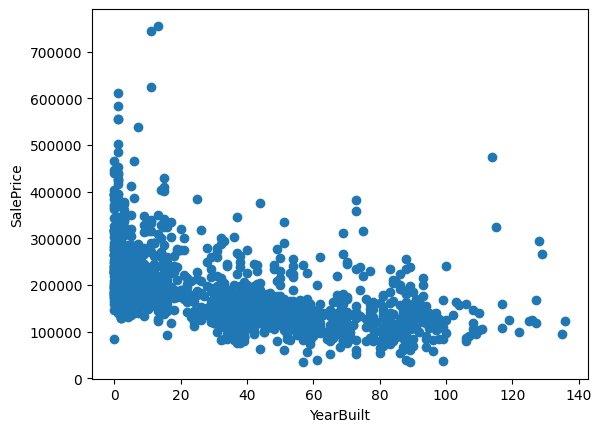

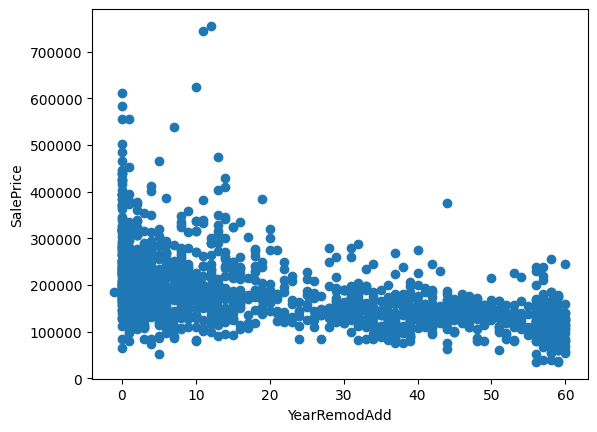

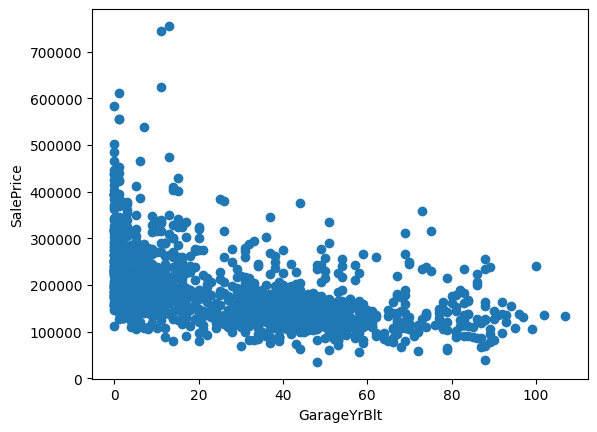

In [ ]:
for features in year_features:
  if features != 'YrSold':
    data = dataset.copy()
    data[features] = data['YrSold'] - data[features]

    plt.scatter(data[features], data['SalePrice'])
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    plt.show()



In [ ]:
#selecting the discrete features
discrete_features = [features for features in numerical_features if (len(dataset[features].unique()) < 30) and features not in year_features+['Id']]
len(discrete_features)

14

In [ ]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold']

In [ ]:
dataset[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1.0,0.0,2,1,3,1,8,0,2.0,0,2
1,20,6,8,0.0,1.0,2,0,3,1,6,1,2.0,0,5
2,60,7,5,1.0,0.0,2,1,3,1,6,1,2.0,0,9
3,70,7,5,1.0,0.0,1,0,3,1,7,1,3.0,0,2
4,60,8,5,1.0,0.0,2,1,4,1,9,1,3.0,0,12


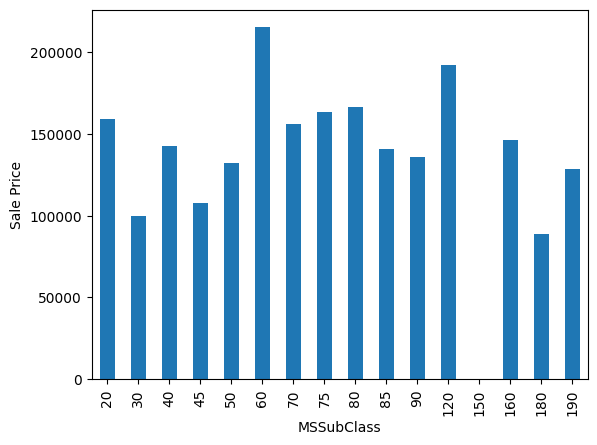

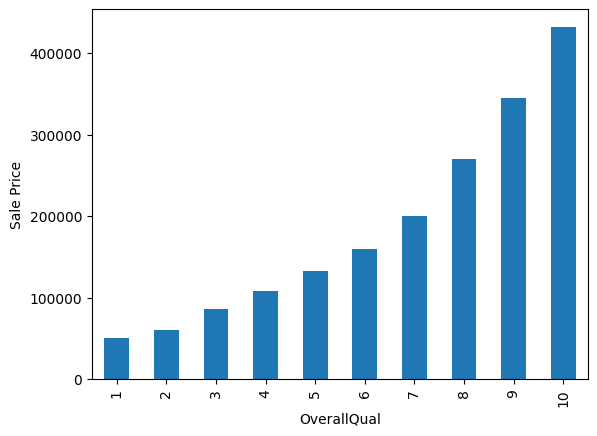

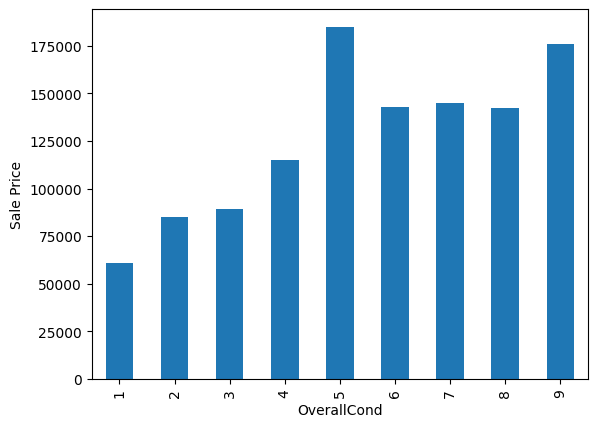

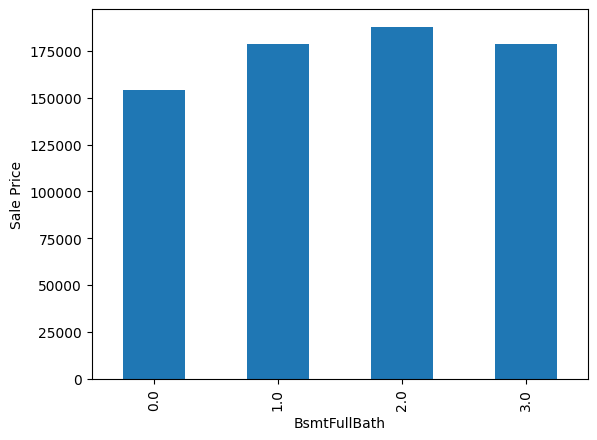

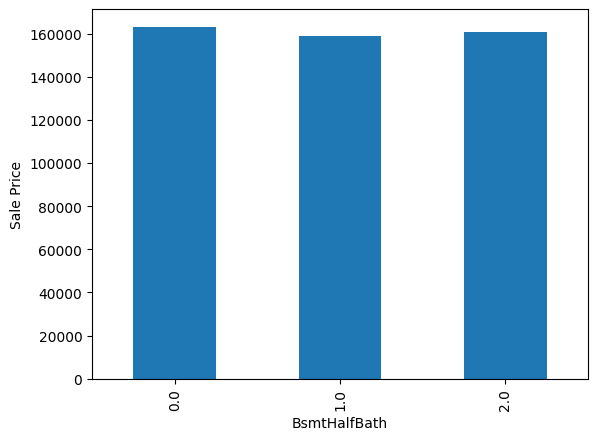

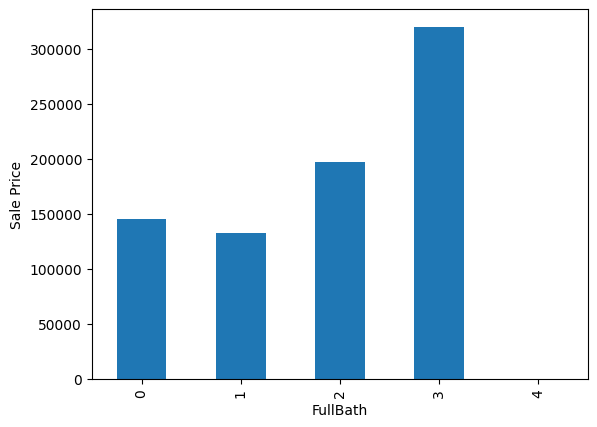

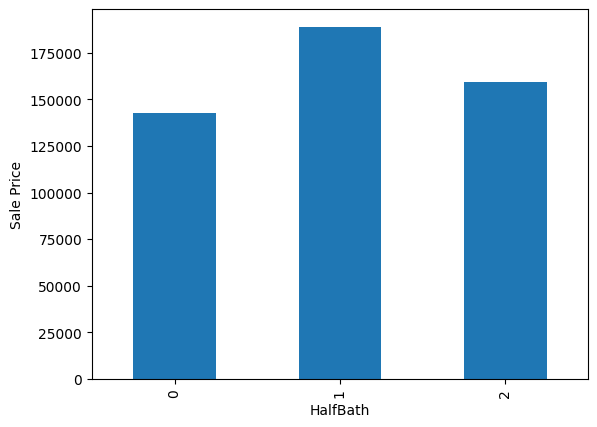

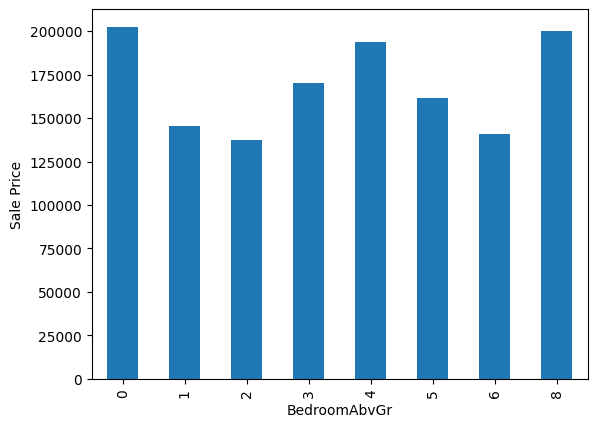

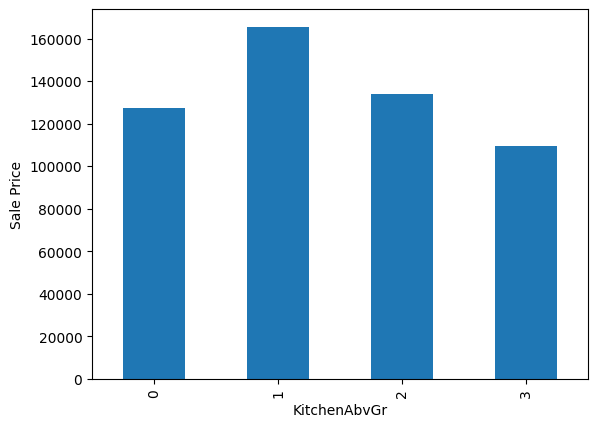

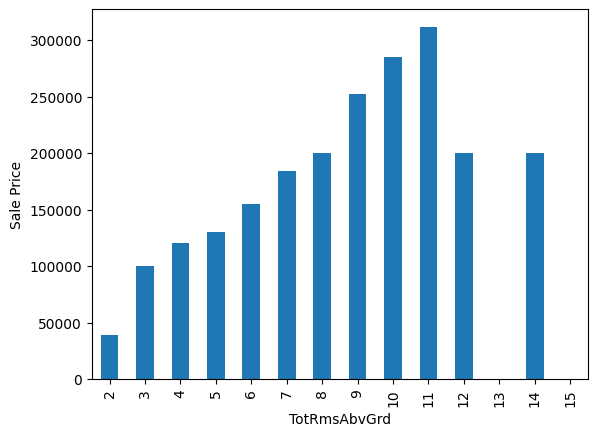

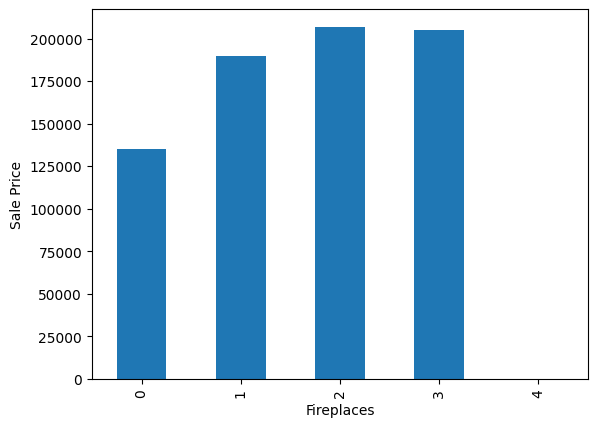

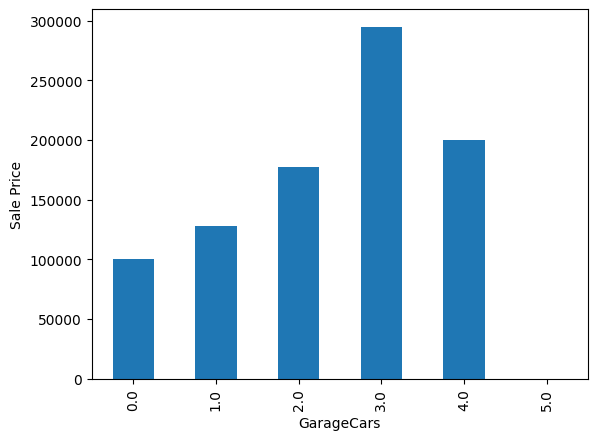

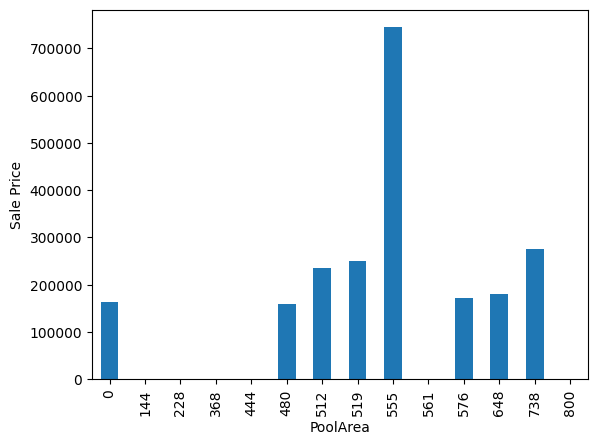

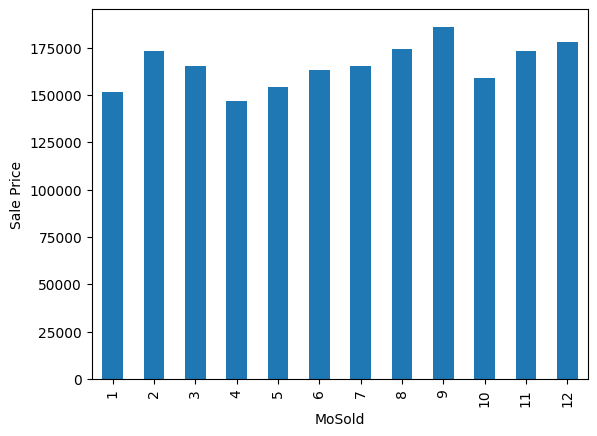

In [ ]:
for features in discrete_features:
  data = dataset.copy()
  data.groupby(features)['SalePrice'].median().plot.bar()
  plt.xlabel(features)
  plt.ylabel('Sale Price')
  plt.show()

Continous features

In [ ]:
continous_features = [features for features in numerical_features if features not in discrete_features + year_features + ['Id']]
len(continous_features)

19

In [ ]:
continous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

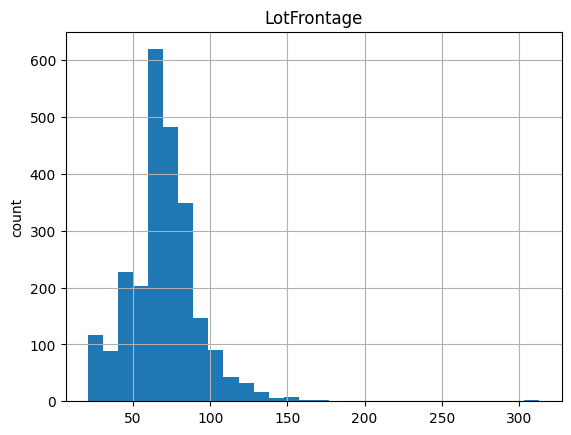

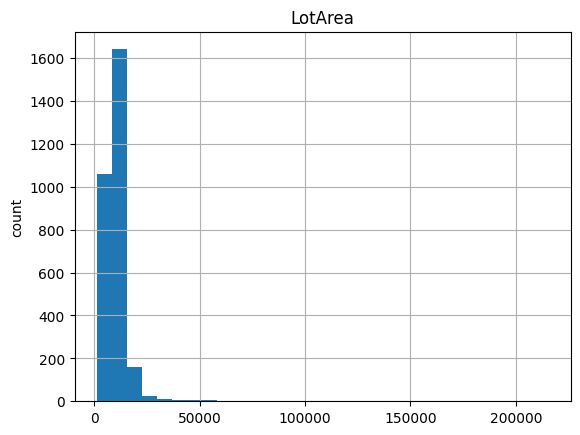

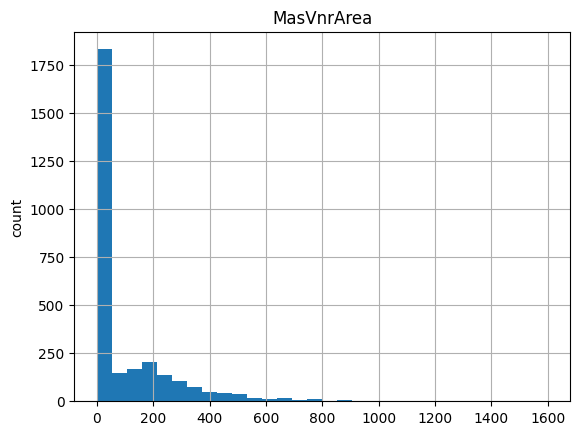

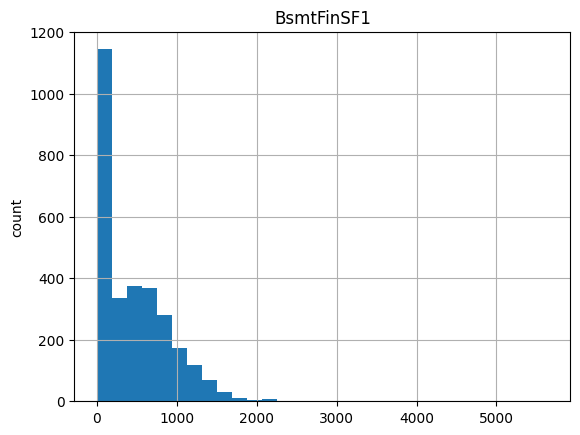

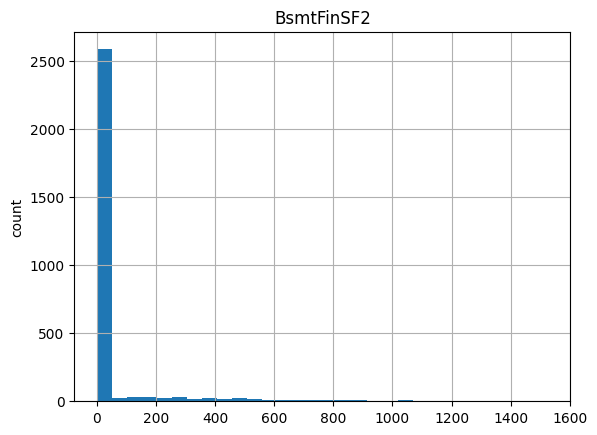

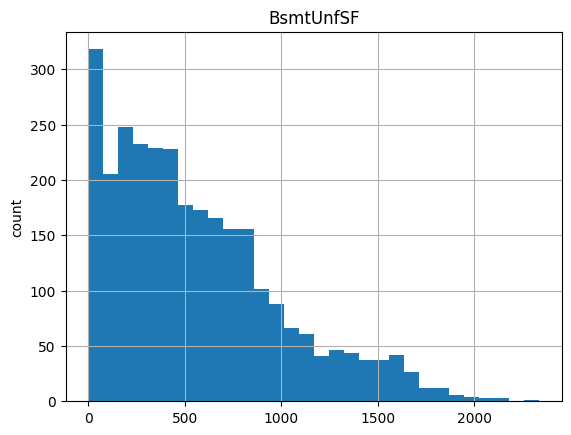

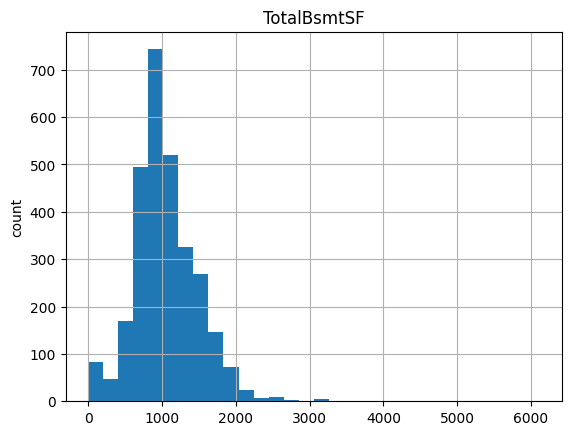

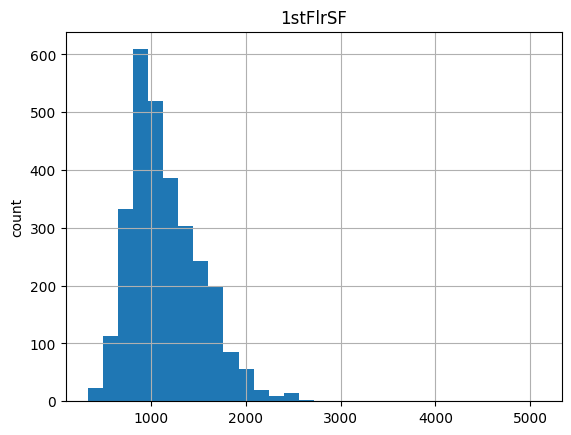

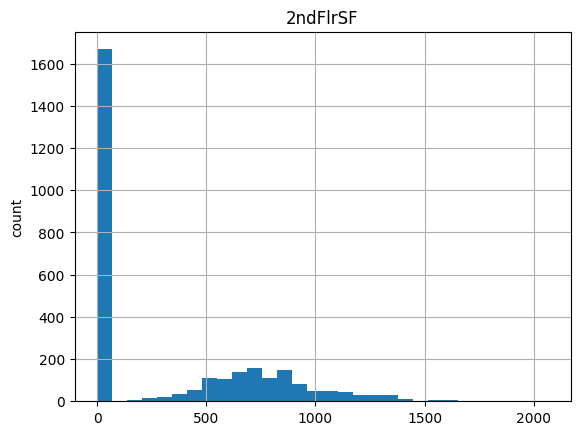

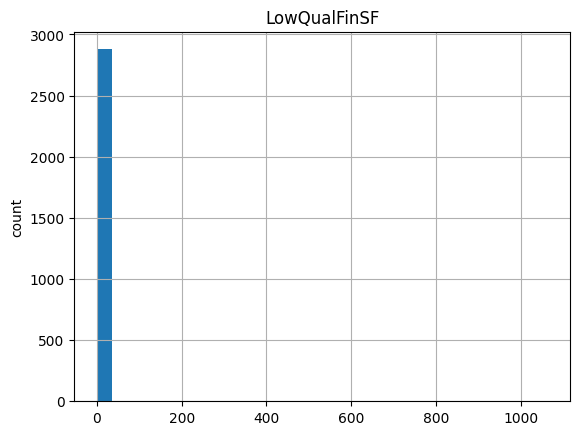

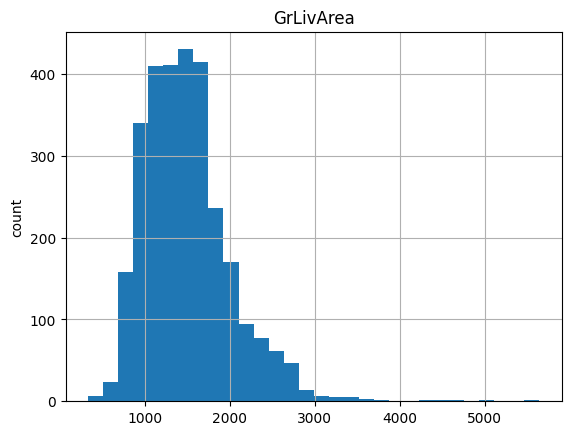

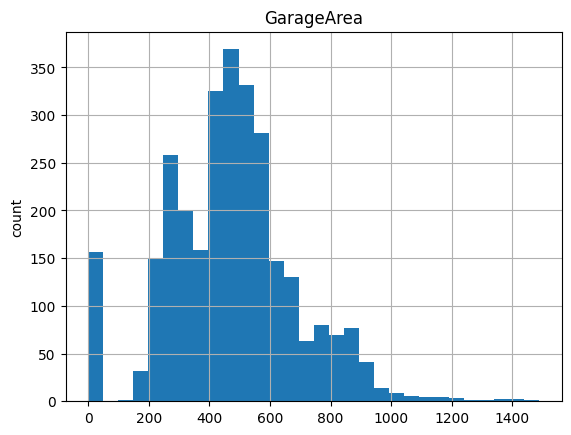

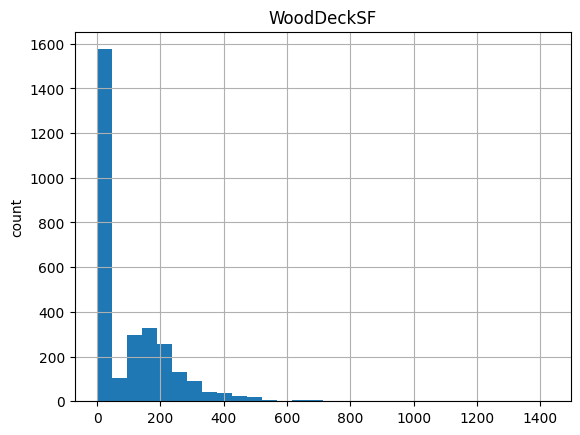

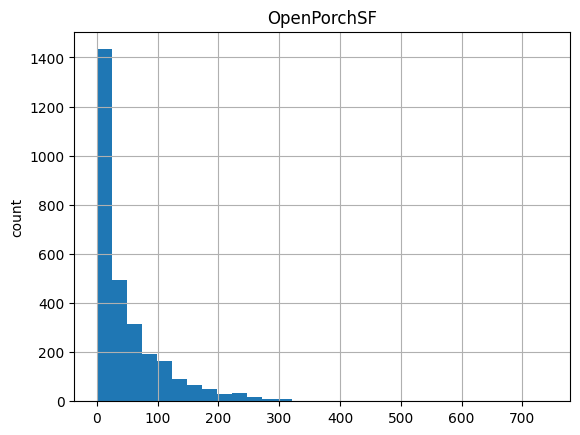

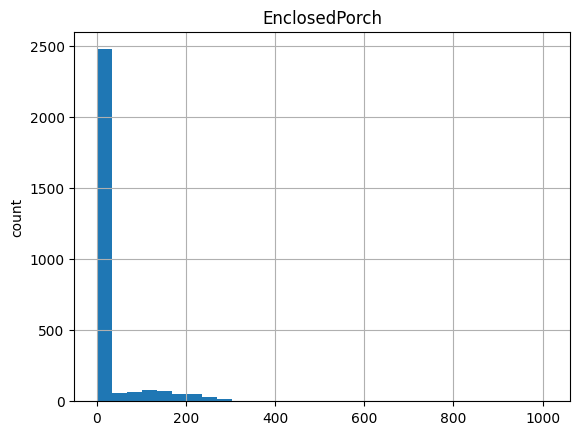

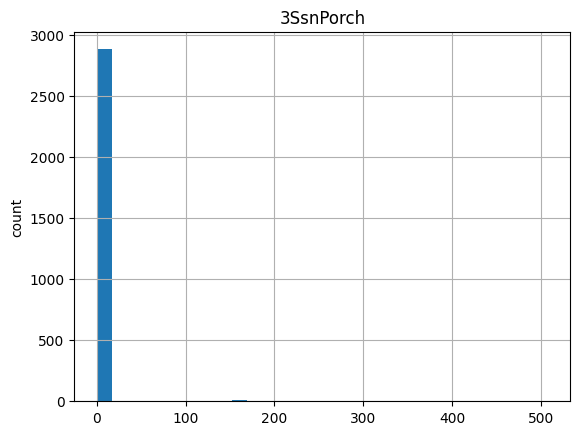

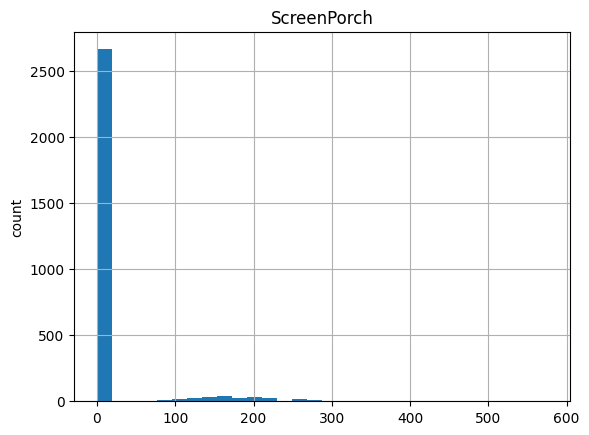

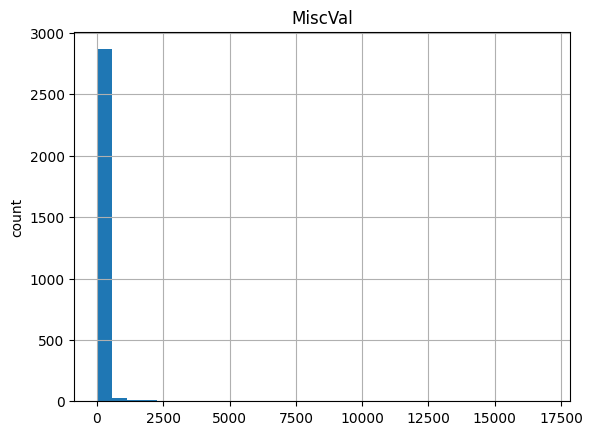

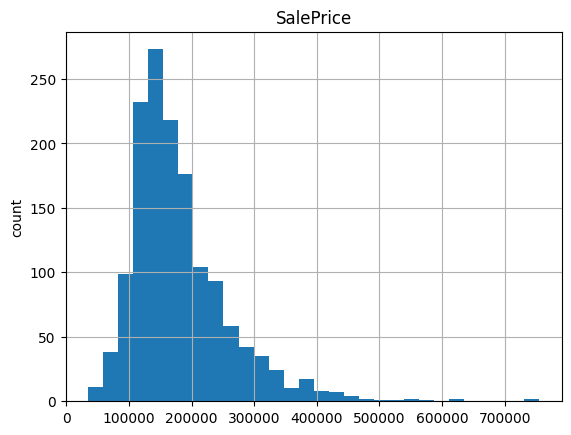

In [ ]:
for features in continous_features:
  data = dataset.copy()
  data[features].hist(bins = 30)
  plt.title(features)
  plt.ylabel('count')
  plt.show()


Converting the non gaussian features into gaussian features by log transformation

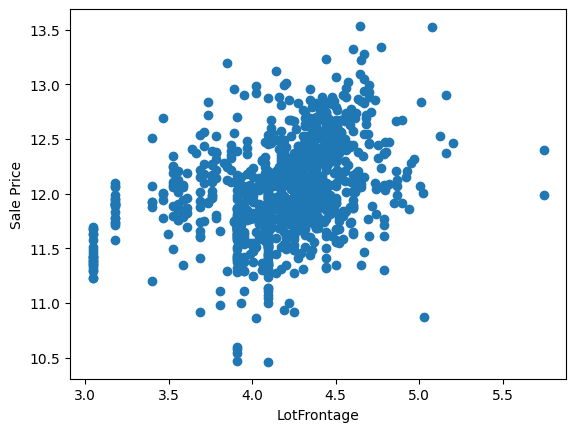

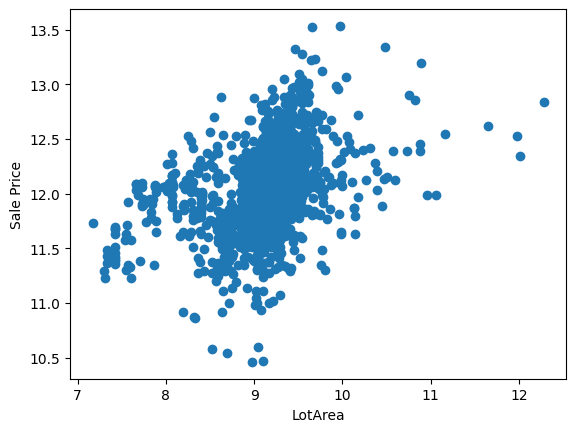

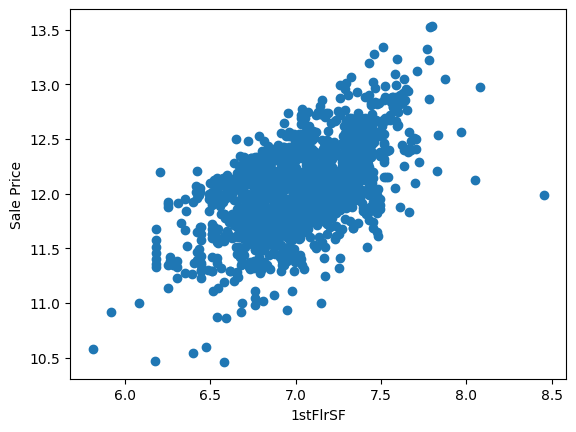

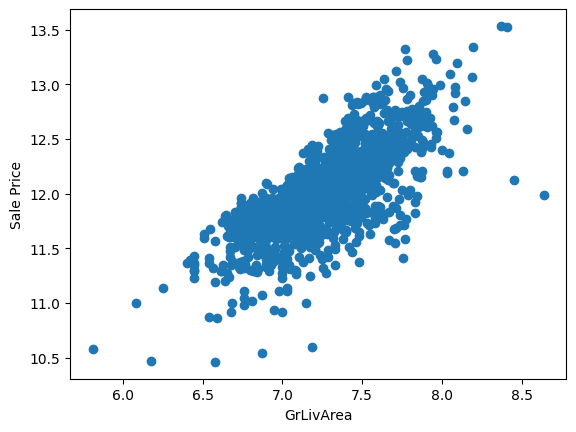

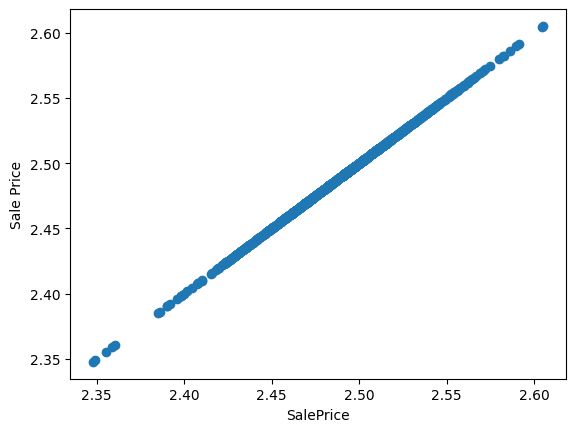

In [ ]:
for features in continous_features:
  data = dataset.copy()
  if 0 in data[features].unique():
    pass
  else:
    data[features] = np.log(data[features])
    data['SalePrice'] = np.log(data['SalePrice'])
    plt.scatter(data[features], data['SalePrice'])
    plt.xlabel(features)
    plt.ylabel('Sale Price')
    plt.show()

# Outliers detection with boxplot

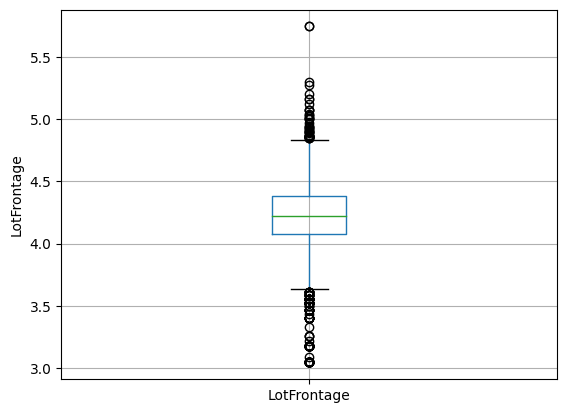

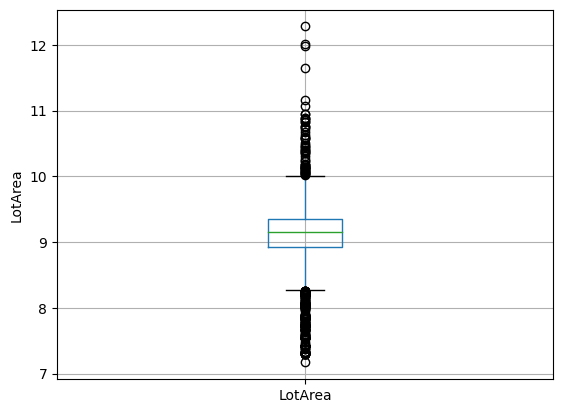

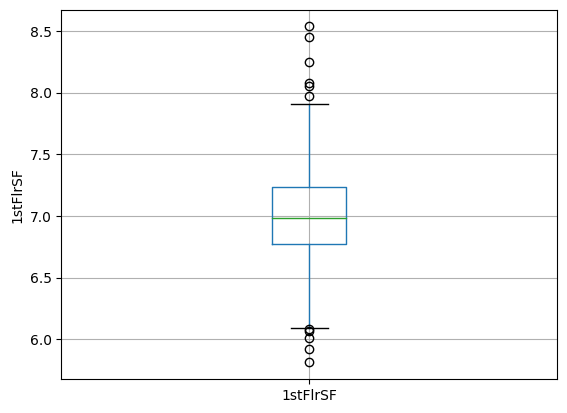

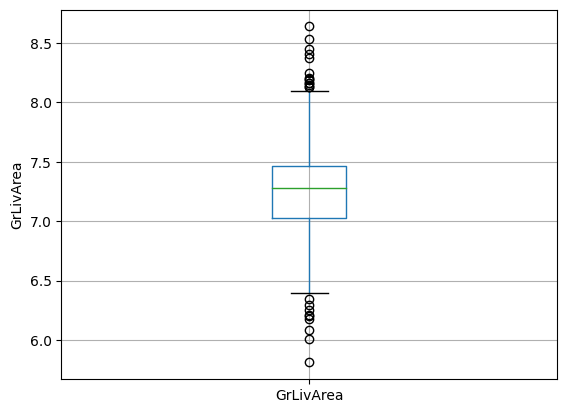

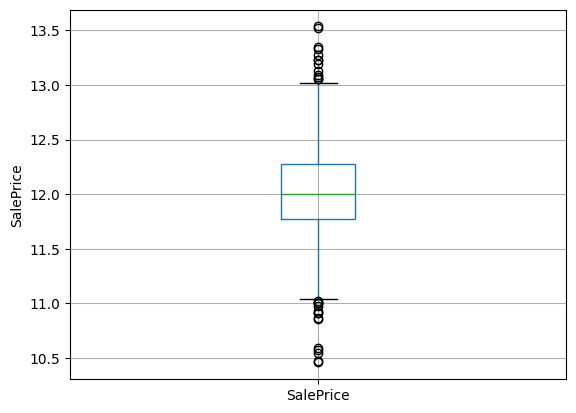

In [ ]:
for features in continous_features:
  data = dataset.copy()
  if 0 in data[features].unique():
    pass
  else:
    data[features] = np.log(data[features])
    data.boxplot(column = features)
    plt.ylabel(features)
    plt.show()

# Categorical features

In [ ]:
#categorical features are object data type
categorical_features = [features for features in dataset if dataset[features].dtype == 'O']
len(categorical_features)

43

In [ ]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
dataset[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
for features in categorical_features:
  print('number of unique categories in',features , 'is: ', len(dataset[features].unique()))

number of unique categories in MSZoning is:  6
number of unique categories in Street is:  2
number of unique categories in Alley is:  3
number of unique categories in LotShape is:  4
number of unique categories in LandContour is:  4
number of unique categories in Utilities is:  3
number of unique categories in LotConfig is:  5
number of unique categories in LandSlope is:  3
number of unique categories in Neighborhood is:  25
number of unique categories in Condition1 is:  9
number of unique categories in Condition2 is:  8
number of unique categories in BldgType is:  5
number of unique categories in HouseStyle is:  8
number of unique categories in RoofStyle is:  6
number of unique categories in RoofMatl is:  8
number of unique categories in Exterior1st is:  16
number of unique categories in Exterior2nd is:  17
number of unique categories in MasVnrType is:  5
number of unique categories in ExterQual is:  4
number of unique categories in ExterCond is:  5
number of unique categories in Foun

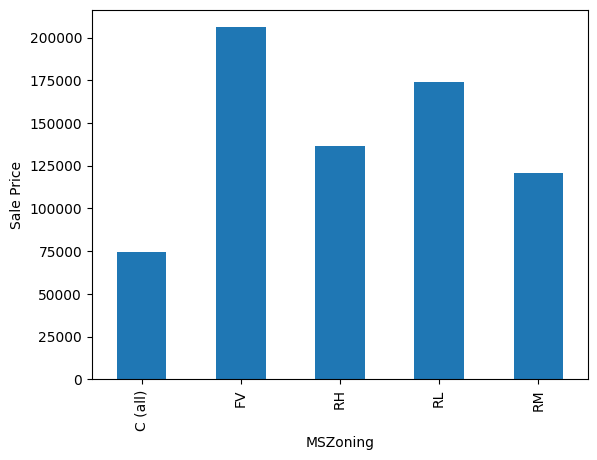

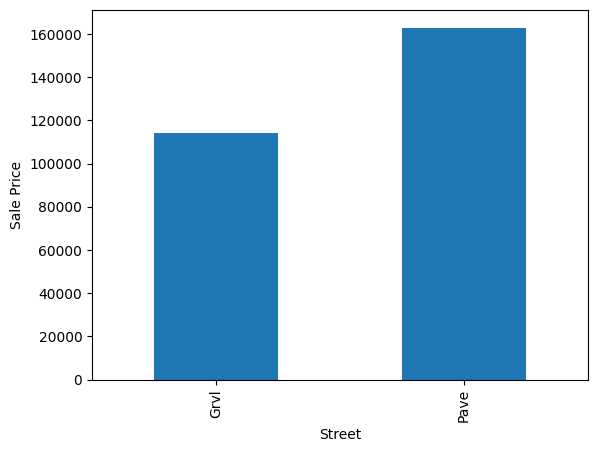

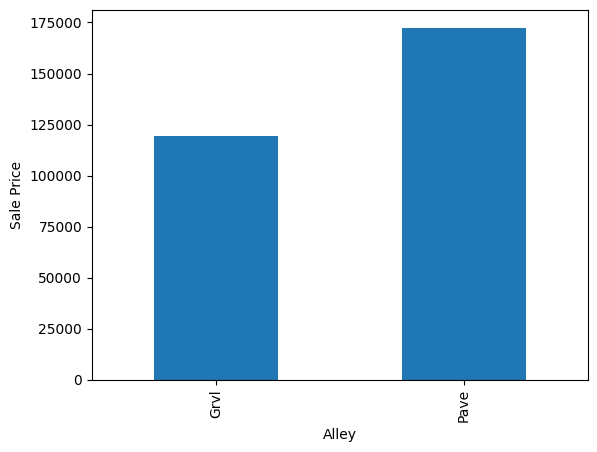

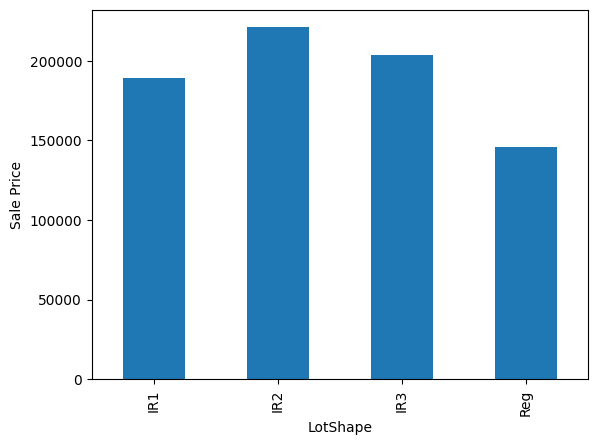

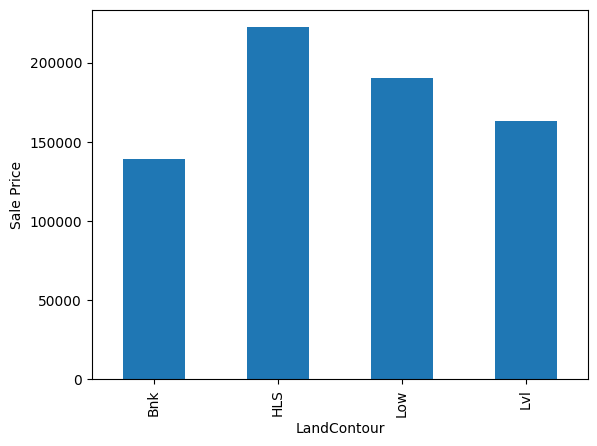

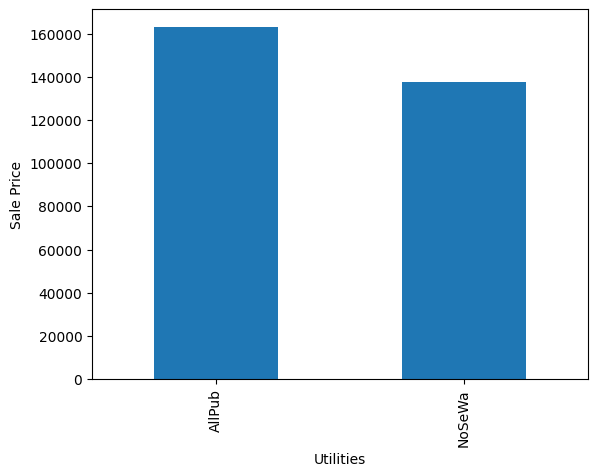

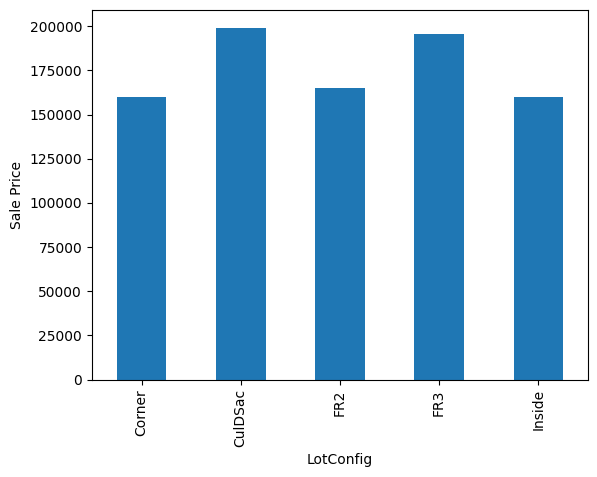

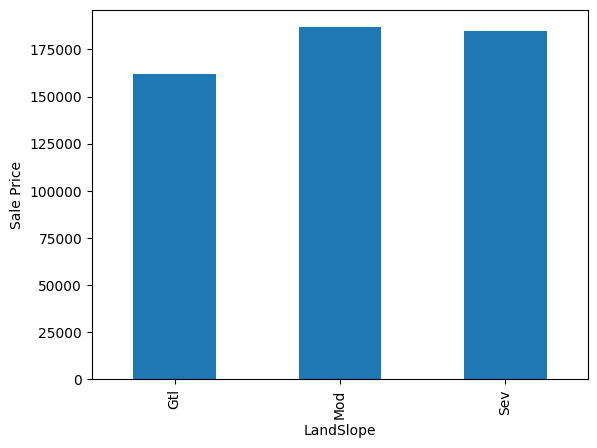

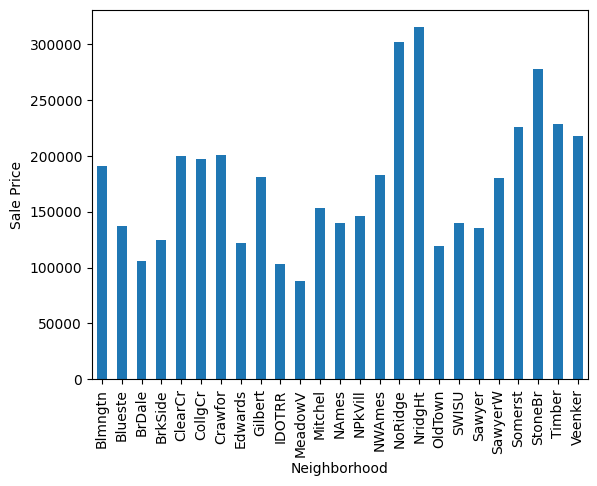

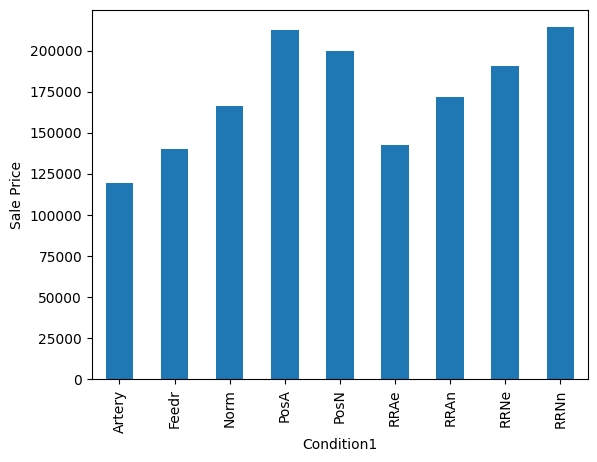

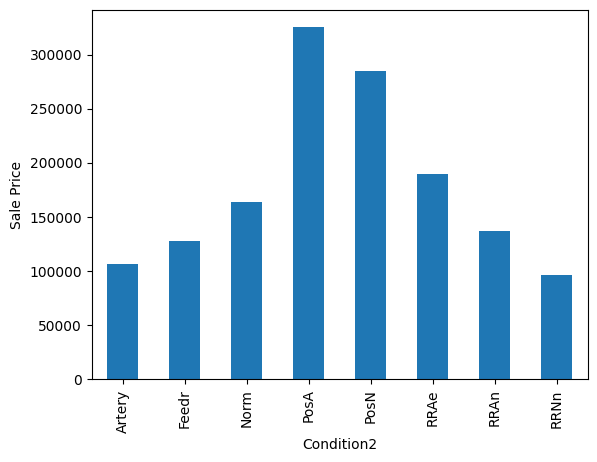

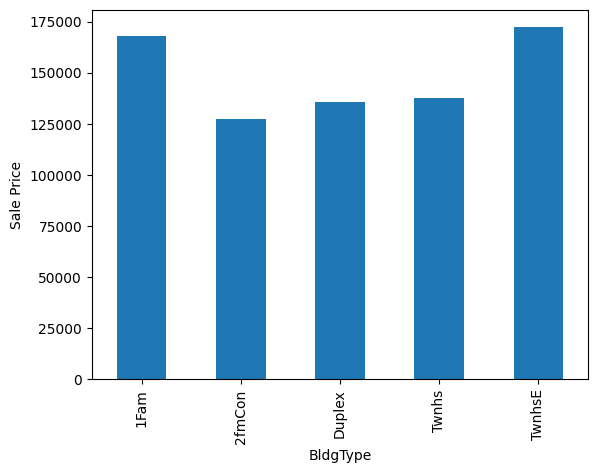

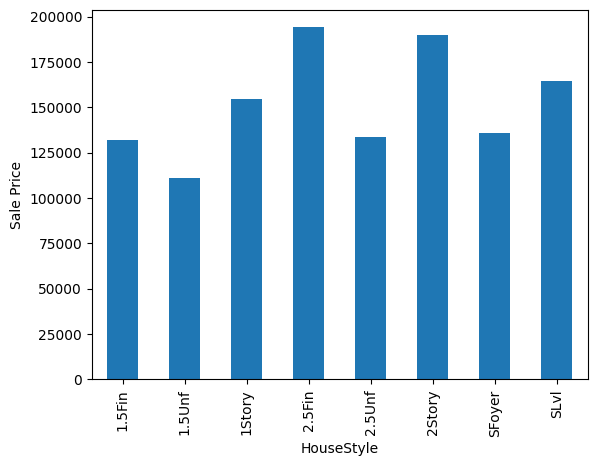

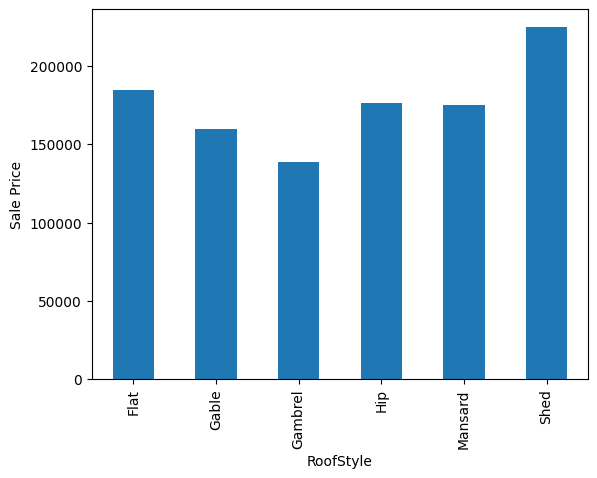

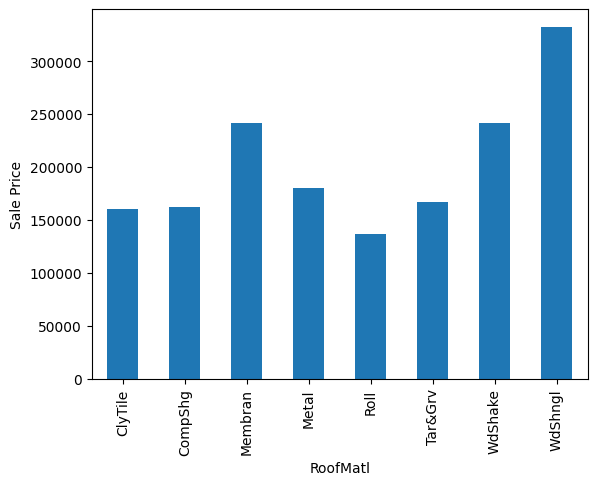

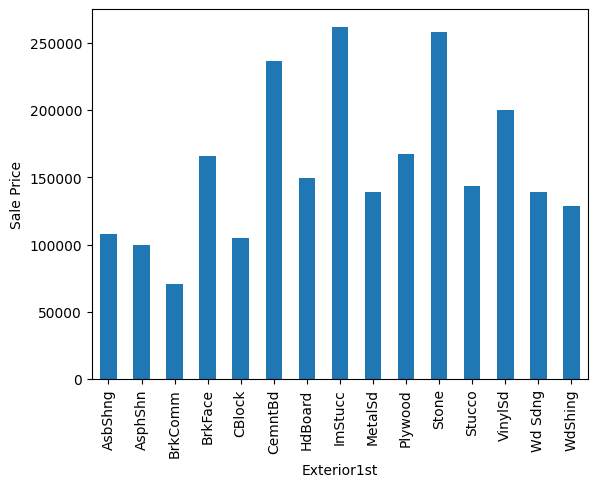

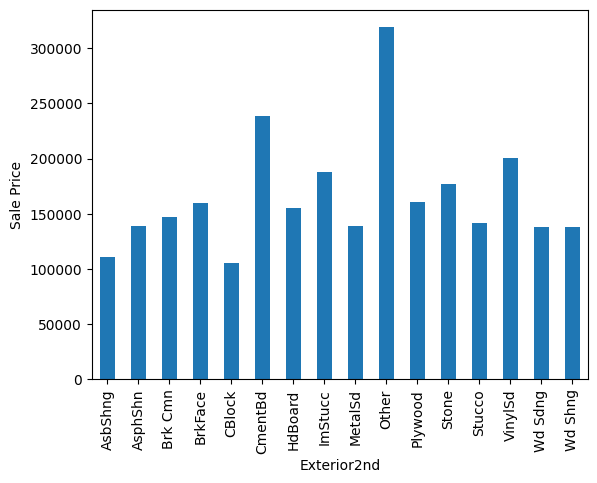

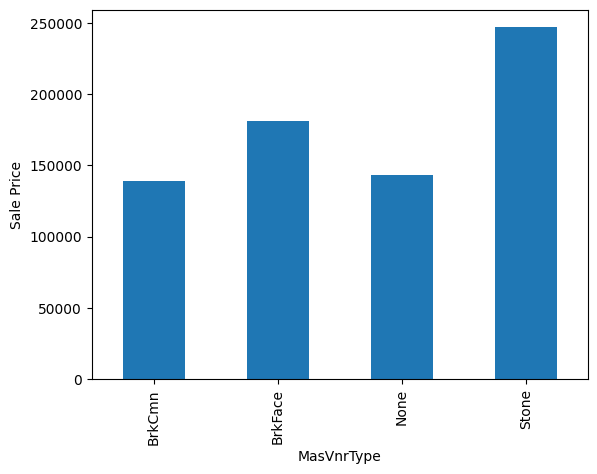

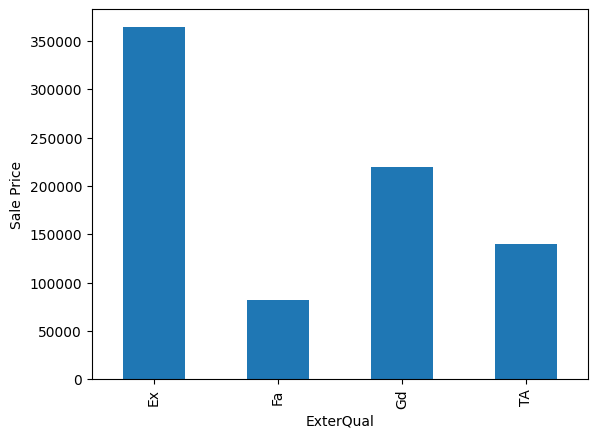

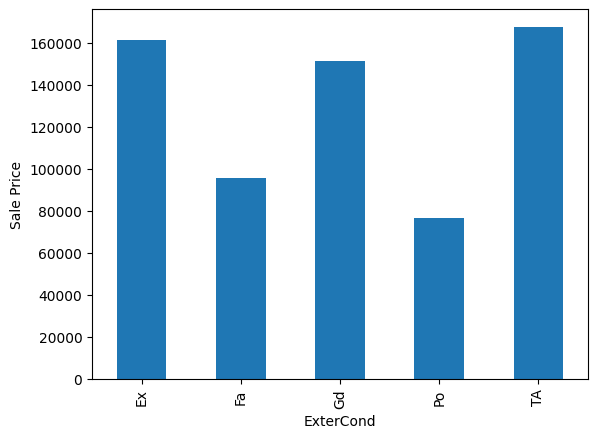

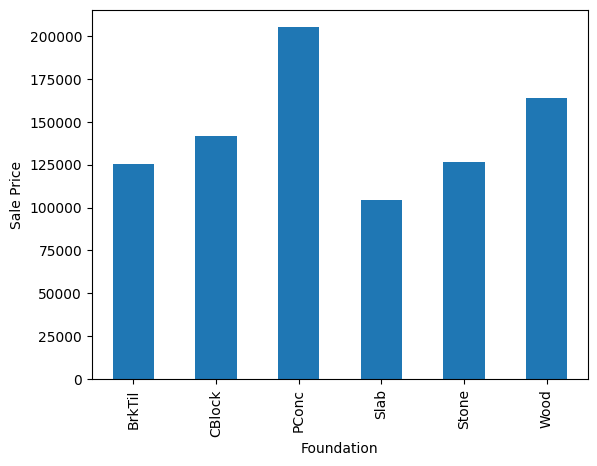

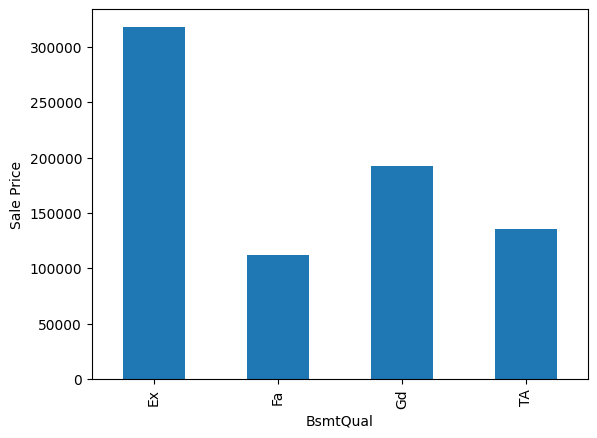

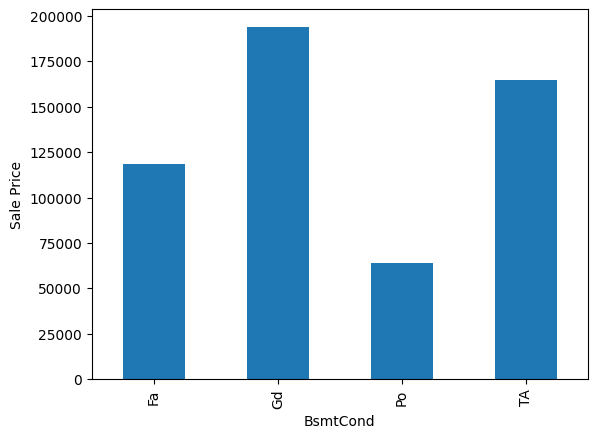

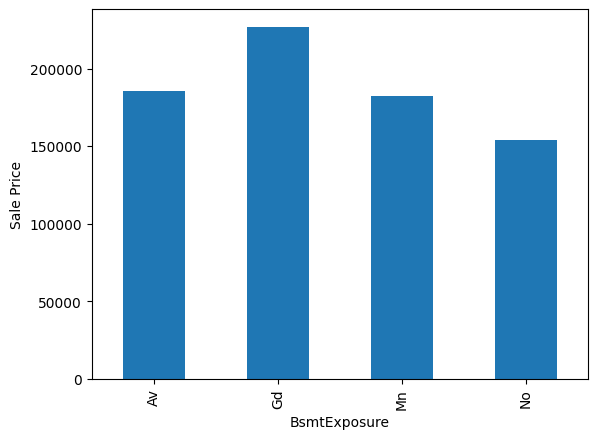

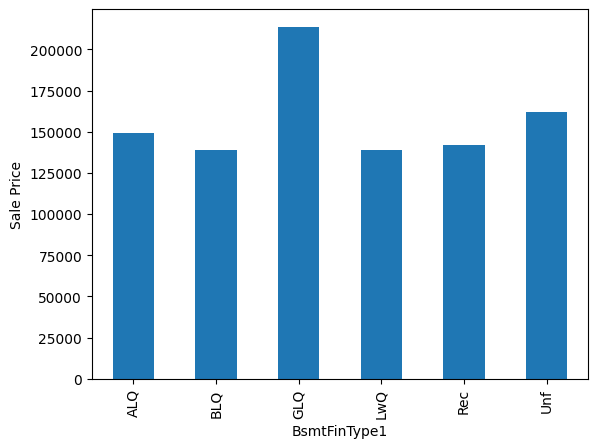

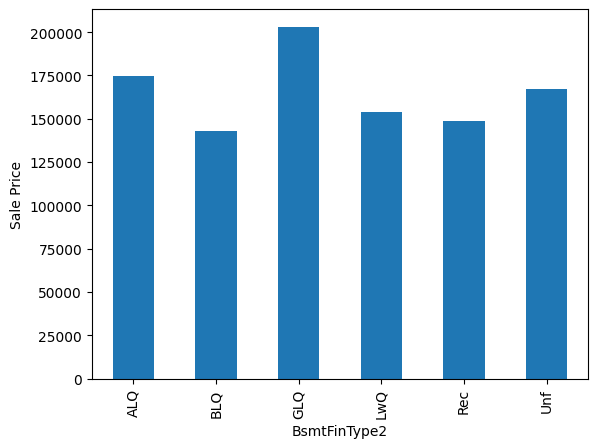

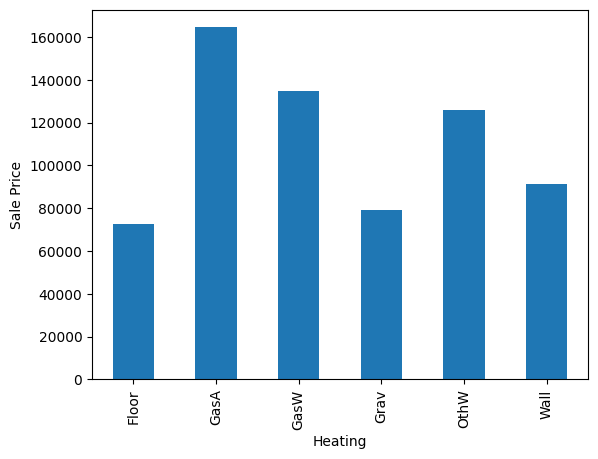

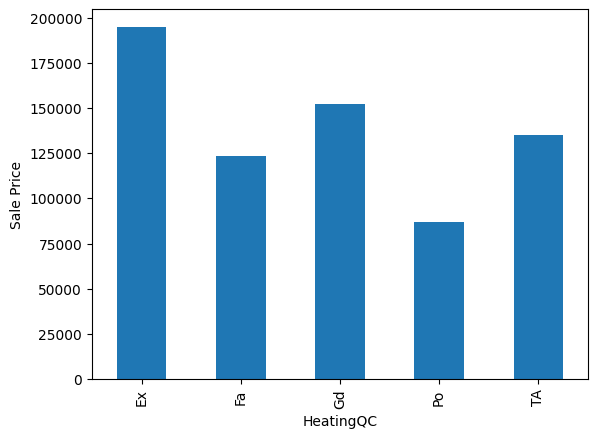

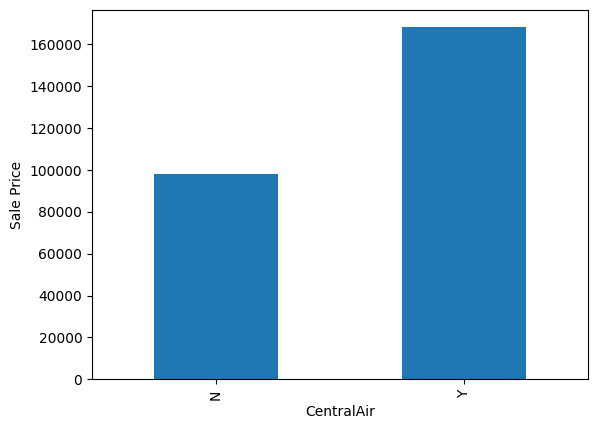

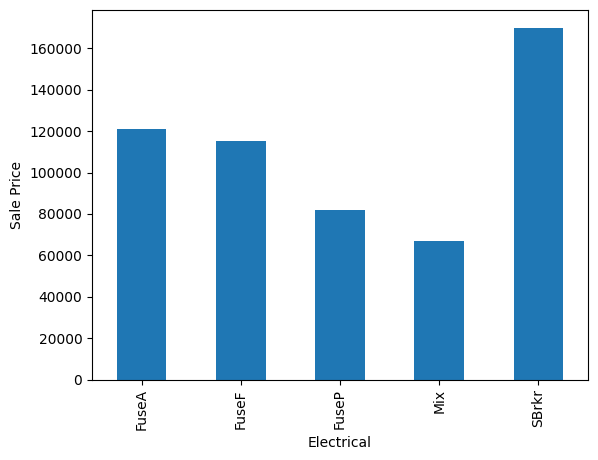

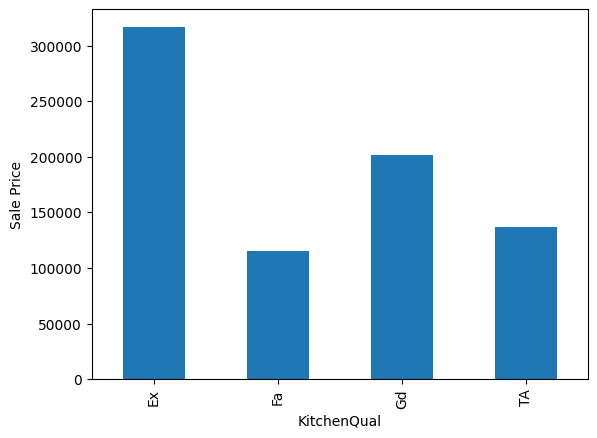

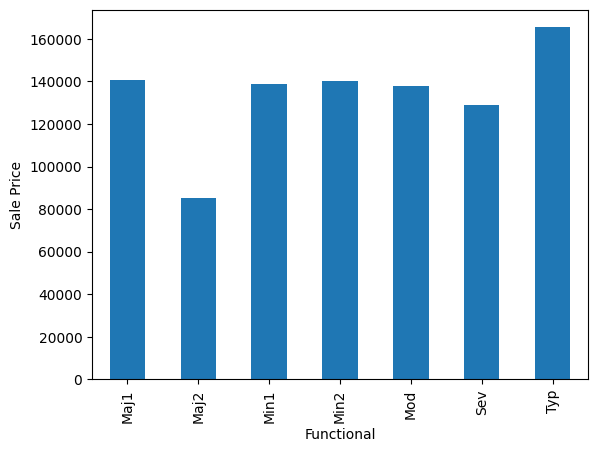

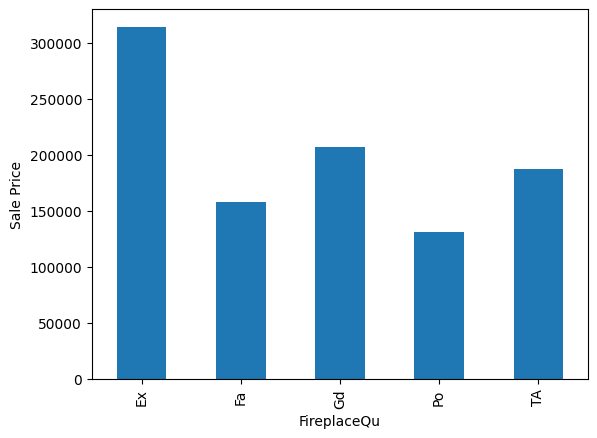

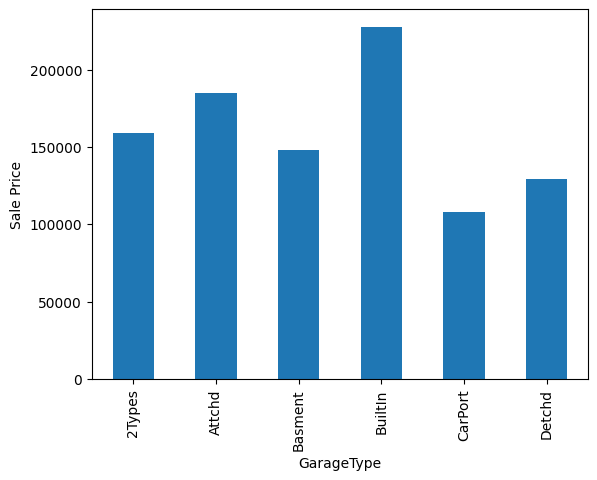

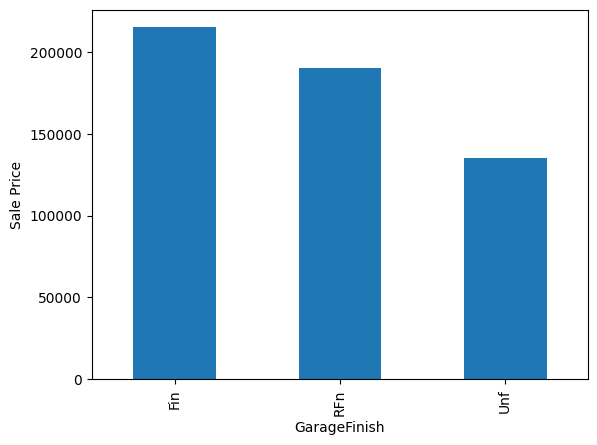

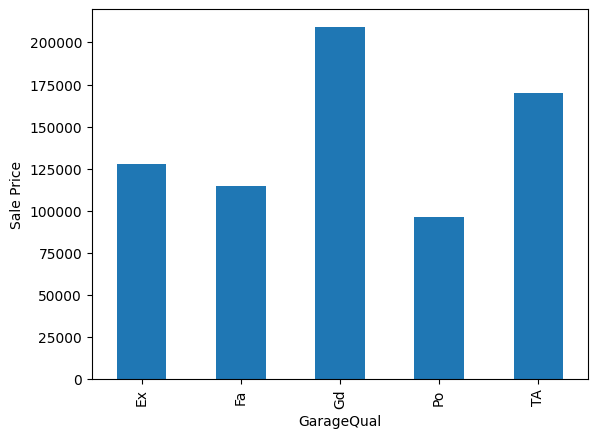

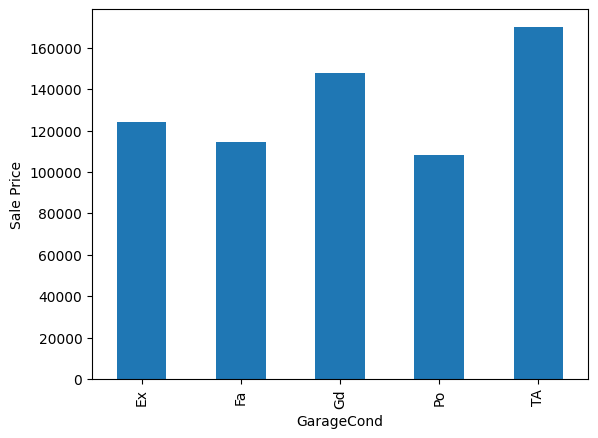

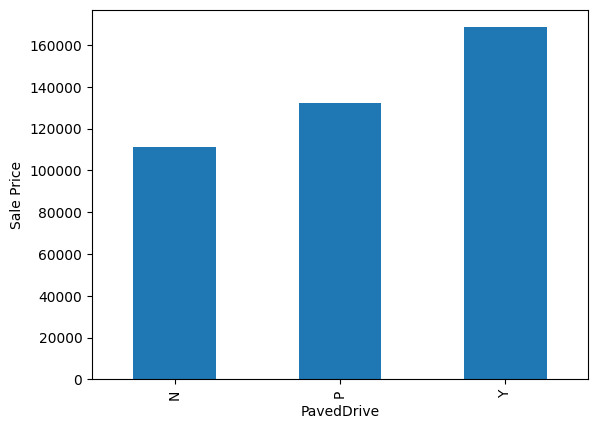

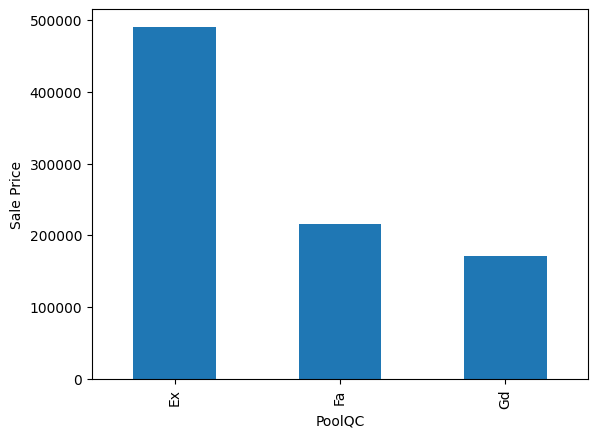

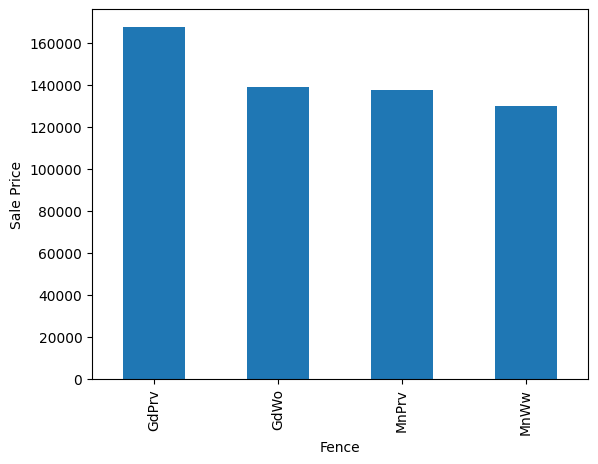

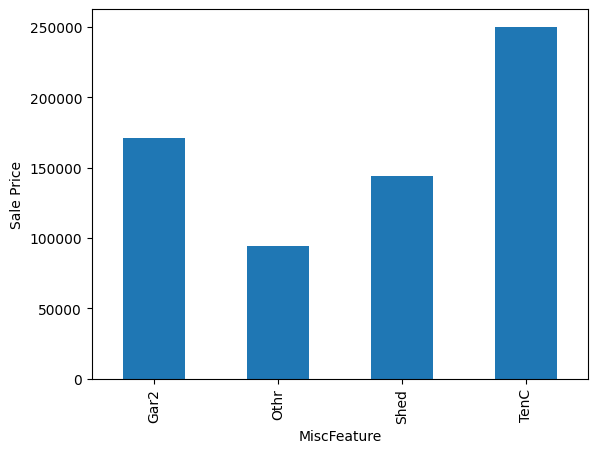

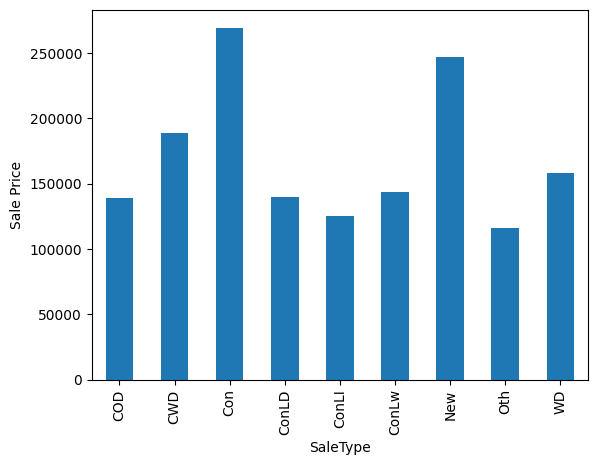

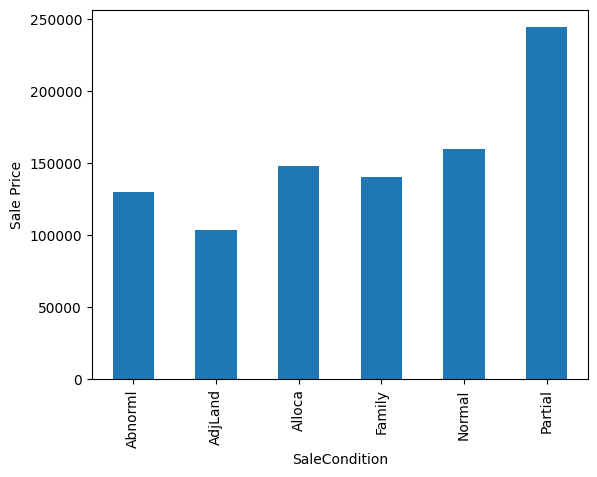

In [ ]:
#realtionship between categorical features and output label
for features in categorical_features:
  data = dataset.copy()
  data.groupby(features)['SalePrice'].median().plot.bar()
  plt.xlabel(features)
  plt.ylabel('Sale Price')
  plt.show()

# Feature Engineering

# Missing values

Missing values in categorical features

In [ ]:
cat_feature_na = [features for features in dataset if dataset[features].isnull().sum() > 1 and dataset[features].dtype == 'O']
print(features, dataset[cat_feature_na].isnull().mean(), "% NaN values")

SaleCondition MSZoning        0.001370
Alley           0.932169
Utilities       0.000685
MasVnrType      0.008222
BsmtQual        0.027749
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtFinType1    0.027064
BsmtFinType2    0.027407
Functional      0.000685
FireplaceQu     0.486468
GarageType      0.053786
GarageFinish    0.054471
GarageQual      0.054471
GarageCond      0.054471
PoolQC          0.996574
Fence           0.804385
MiscFeature     0.964029
dtype: float64 % NaN values


Handelling the missing values, replaing the nan value with 'missing values'

In [ ]:
def replace_nan(dataset, features):
  data = dataset.copy()
  data[features] = data[features].fillna('missing')
  return data
dataset = replace_nan(dataset, cat_feature_na)
dataset[cat_feature_na].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [ ]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,missing,Reg,Lvl,AllPub,...,0,missing,missing,missing,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,missing,Reg,Lvl,AllPub,...,0,missing,missing,missing,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,missing,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,missing,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,missing,0,12,2008,WD,Normal,250000.0


In [ ]:
numerical_feature_na = [features for features in dataset if dataset[features].isnull().sum() > 1 and dataset[features].dtype != 'O']
numerical_feature_na

['LotFrontage',
 'MasVnrArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'SalePrice']

Replacing the nan values in the numerical column with median as it has many outliers

In [ ]:
for features in numerical_feature_na:

  median_value = dataset[features].median()

  #creating the new features that tells us whether it contains the nan value or not
  dataset[features + 'nan'] = np.where(dataset[features].isnull(),1,0)
  dataset[features].fillna(median_value,inplace = True)
print(dataset[numerical_feature_na].isnull().sum())

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
SalePrice       0
dtype: int64


In [ ]:
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1,60,RL,65.0,8450,Pave,missing,Reg,Lvl,AllPub,...,2008,WD,Normal,208500.0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,missing,Reg,Lvl,AllPub,...,2007,WD,Normal,181500.0,0,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,missing,IR1,Lvl,AllPub,...,2008,WD,Normal,223500.0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,missing,IR1,Lvl,AllPub,...,2006,WD,Abnorml,140000.0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,missing,IR1,Lvl,AllPub,...,2008,WD,Normal,250000.0,0,0,0,0,0,0
5,6,50,RL,85.0,14115,Pave,missing,IR1,Lvl,AllPub,...,2009,WD,Normal,143000.0,0,0,0,0,0,0
6,7,20,RL,75.0,10084,Pave,missing,Reg,Lvl,AllPub,...,2007,WD,Normal,307000.0,0,0,0,0,0,0
7,8,60,RL,68.0,10382,Pave,missing,IR1,Lvl,AllPub,...,2009,WD,Normal,200000.0,1,0,0,0,0,0
8,9,50,RM,51.0,6120,Pave,missing,Reg,Lvl,AllPub,...,2008,WD,Abnorml,129900.0,0,0,0,0,0,0
9,10,190,RL,50.0,7420,Pave,missing,Reg,Lvl,AllPub,...,2008,WD,Normal,118000.0,0,0,0,0,0,0


As with the year sold the sale price is decreasing which is not true so we will find the correlation between year built, year modified, and garage year built with year sold column

In [ ]:
#temporal variable (data time type)
for features in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
  dataset[features] = dataset['YrSold'] - dataset[features]

In [ ]:
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1,60,RL,65.0,8450,Pave,missing,Reg,Lvl,AllPub,...,2008,WD,Normal,208500.0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,missing,Reg,Lvl,AllPub,...,2007,WD,Normal,181500.0,0,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,missing,IR1,Lvl,AllPub,...,2008,WD,Normal,223500.0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,missing,IR1,Lvl,AllPub,...,2006,WD,Abnorml,140000.0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,missing,IR1,Lvl,AllPub,...,2008,WD,Normal,250000.0,0,0,0,0,0,0
5,6,50,RL,85.0,14115,Pave,missing,IR1,Lvl,AllPub,...,2009,WD,Normal,143000.0,0,0,0,0,0,0
6,7,20,RL,75.0,10084,Pave,missing,Reg,Lvl,AllPub,...,2007,WD,Normal,307000.0,0,0,0,0,0,0
7,8,60,RL,68.0,10382,Pave,missing,IR1,Lvl,AllPub,...,2009,WD,Normal,200000.0,1,0,0,0,0,0
8,9,50,RM,51.0,6120,Pave,missing,Reg,Lvl,AllPub,...,2008,WD,Abnorml,129900.0,0,0,0,0,0,0
9,10,190,RL,50.0,7420,Pave,missing,Reg,Lvl,AllPub,...,2008,WD,Normal,118000.0,0,0,0,0,0,0


In [ ]:
dataset[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


# Log transformation

In [ ]:
skewed_num_features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for features in skewed_num_features:
  dataset[features] = np.log(dataset[features])

In [ ]:
dataset[skewed_num_features].head()

,LotFrontage,LotArea,1stFlrSF,GrLivArea,SalePrice
0,4.174387,9.041922,6.752270,7.444249,12.247694
1,4.382027,9.169518,7.140453,7.140453,12.109011
2,4.219508,9.328123,6.824374,7.487734,12.317167
3,4.094345,9.164296,6.867974,7.448334,11.849398
4,4.430817,9.565214,7.043160,7.695303,12.429216


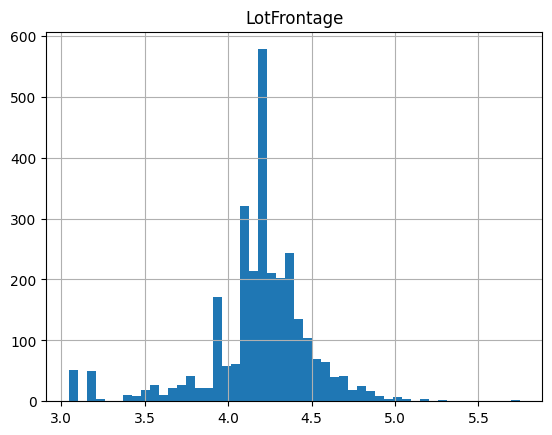

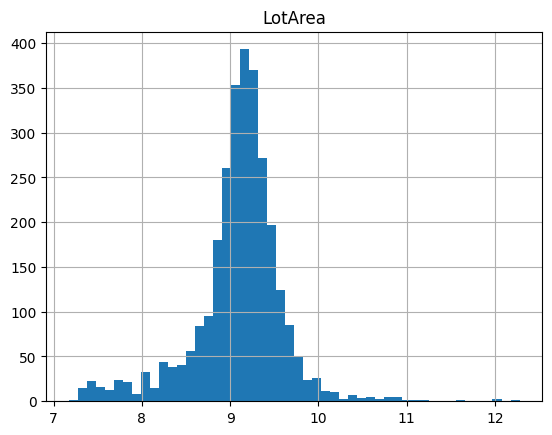

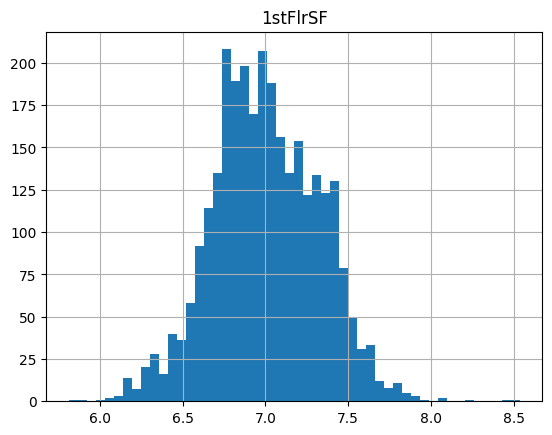

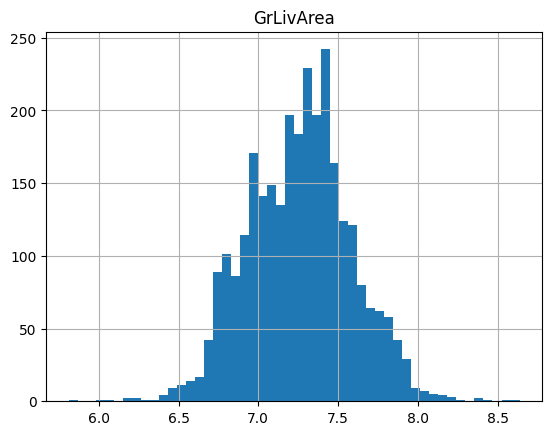

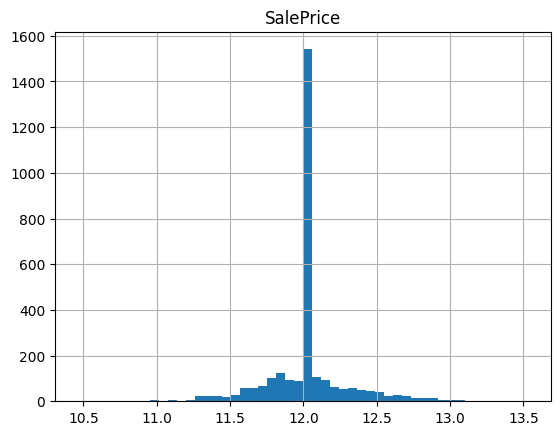

In [ ]:
for features in skewed_num_features:
  data = dataset.copy()
  data[features].hist(bins = 50)
  plt.title(features)
  plt.show()

Now these numerical features looks more normally distributed

# Rare categorical variables
remove those categories that present less than 1% labels

In [ ]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
for features in categorical_features:
  percentage = dataset.groupby(features)['SalePrice'].count()/len(dataset)
  rare_index = percentage[percentage < 0.01].index
  dataset[features] = np.where(dataset[features].isin(rare_index),'Rare var', dataset[features])

In [ ]:
dataset.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1,60,RL,4.174387,9.041922,Pave,missing,Reg,Lvl,AllPub,...,2008,WD,Normal,12.247694,0,0,0,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,missing,Reg,Lvl,AllPub,...,2007,WD,Normal,12.109011,0,0,0,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,missing,IR1,Lvl,AllPub,...,2008,WD,Normal,12.317167,0,0,0,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,missing,IR1,Lvl,AllPub,...,2006,WD,Abnorml,11.849398,0,0,0,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,missing,IR1,Lvl,AllPub,...,2008,WD,Normal,12.429216,0,0,0,0,0,0
5,6,50,RL,4.442651,9.554993,Pave,missing,IR1,Lvl,AllPub,...,2009,WD,Normal,11.870600,0,0,0,0,0,0
6,7,20,RL,4.317488,9.218705,Pave,missing,Reg,Lvl,AllPub,...,2007,WD,Normal,12.634603,0,0,0,0,0,0
7,8,60,RL,4.219508,9.247829,Pave,missing,IR1,Lvl,AllPub,...,2009,WD,Normal,12.206073,1,0,0,0,0,0
8,9,50,RM,3.931826,8.719317,Pave,missing,Reg,Lvl,AllPub,...,2008,WD,Abnorml,11.774520,0,0,0,0,0,0
9,10,190,RL,3.912023,8.911934,Pave,missing,Reg,Lvl,AllPub,...,2008,WD,Normal,11.678440,0,0,0,0,0,0


# Feature Scaling

encoding the categorical variables as the string value cannot be converted into the numerical variable by the scaler

In [ ]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [ ]:
dataset.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1,60,2,4.174387,9.041922,1,2,0,1,1,...,2008,2.0,3,12.247694,0,0,0,0,0,0
1,2,20,2,4.382027,9.169518,1,2,0,1,1,...,2007,2.0,3,12.109011,0,0,0,0,0,0
2,3,60,2,4.219508,9.328123,1,2,1,1,1,...,2008,2.0,3,12.317167,0,0,0,0,0,0
3,4,70,2,4.094345,9.164296,1,2,1,1,1,...,2006,2.0,0,11.849398,0,0,0,0,0,0
4,5,60,2,4.430817,9.565214,1,2,1,1,1,...,2008,2.0,3,12.429216,0,0,0,0,0,0
5,6,50,2,4.442651,9.554993,1,2,1,1,1,...,2009,2.0,3,11.870600,0,0,0,0,0,0
6,7,20,2,4.317488,9.218705,1,2,0,1,1,...,2007,2.0,3,12.634603,0,0,0,0,0,0
7,8,60,2,4.219508,9.247829,1,2,1,1,1,...,2009,2.0,3,12.206073,1,0,0,0,0,0
8,9,50,1,3.931826,8.719317,1,2,0,1,1,...,2008,2.0,0,11.774520,0,0,0,0,0,0
9,10,190,2,3.912023,8.911934,1,2,0,1,1,...,2008,2.0,3,11.678440,0,0,0,0,0,0


In [ ]:
#standerdising the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_to_scale = [features for features in dataset.columns if features not in ['SalePrice', 'Id']]

In [ ]:
#conatinating the Id and SalePrice column with the scaled dataset
data = pd.concat([dataset[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.fit_transform(dataset[data_to_scale]), columns=data_to_scale)],
                    axis=1)

In [ ]:
data.head(20)

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1,12.247694,0.235294,0.666667,0.418208,0.366344,1.0,1.0,0.000000,0.333333,...,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
1,2,12.109011,0.000000,0.666667,0.495064,0.391317,1.0,1.0,0.000000,0.333333,...,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
2,3,12.317167,0.235294,0.666667,0.434909,0.422359,1.0,1.0,0.333333,0.333333,...,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
3,4,11.849398,0.294118,0.666667,0.388581,0.390295,1.0,1.0,0.333333,0.333333,...,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.666667,0.513123,0.468761,1.0,1.0,0.333333,0.333333,...,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
5,6,11.870600,0.176471,0.666667,0.517503,0.466761,1.0,1.0,0.333333,0.333333,...,0.818182,0.75,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
6,7,12.634603,0.000000,0.666667,0.471175,0.400943,1.0,1.0,0.000000,0.333333,...,0.636364,0.25,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
7,8,12.206073,0.235294,0.666667,0.434909,0.406643,1.0,1.0,0.333333,0.333333,...,0.909091,0.75,0.666667,0.75,1.0,0.0,0.0,0.0,0.0,0.0
8,9,11.774520,0.176471,0.333333,0.328426,0.303205,1.0,1.0,0.000000,0.333333,...,0.272727,0.50,0.666667,0.00,0.0,0.0,0.0,0.0,0.0,0.0
9,10,11.678440,1.000000,0.666667,0.321097,0.340903,1.0,1.0,0.000000,0.333333,...,0.000000,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.to_csv('train(1).csv')

# Feature Selection

In [ ]:
from sklearn.feature_selection import SelectFromModel
#will use regularisation technique to select the important features
from sklearn.linear_model import Lasso

In [ ]:
from sklearn.model_selection import train_test_split
x = dataset.drop(columns = 'SalePrice', axis = 1)
y = dataset['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [ ]:
cols_with_nan = []
for cols in x_train.columns:
  if x_train[cols].isnull().sum() > 0:
    cols_with_nan.append(cols)

In [ ]:
cols_with_nan
for cols in cols_with_nan:
  print(cols,x_train[cols].isnull().sum())

Exterior1st 1
Exterior2nd 1
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
Electrical 1
KitchenQual 1
GarageCars 1
GarageArea 1
SaleType 1


In [ ]:
x_train.fillna(x_train.median(),inplace = True)

Applying regularisation to select from all the features.

In [ ]:
# apply regularistaion Lasso and SelectFromModel to identify the model with only important features
feature_selection_model = SelectFromModel(Lasso(alpha = 0.001, random_state = 0))
feature_selection_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.721e+01, tolerance: 1.659e-02
  model = cd_fast.enet_coordinate_descent(


SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [ ]:
# it gives a list of boolean type with selected features as True and ignored eatures as False
feature_selection_model.get_support()

array([False,  True,  True, False,  True, False, False,  True, False,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False, False,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True])

In [ ]:
selected_features = x_train.columns[feature_selection_model.get_support()]
print(selected_features)
print('number of features selected is: ',len(selected_features))

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageArea',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'LotFrontagenan', 'SalePricenan'],
      dtype='object')
number of features selected is:  58


In [ ]:
#this is the new dataset with less number of features after applying regularisation.
xtrain = x_train[selected_features]
xtrain.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,Condition1,Condition2,BldgType,OverallQual,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,SalePricenan
279,60,2,9.210840,0,0,17,2,1,3,7,...,0,0,4,0,3,2008,2.0,3,0,0
907,50,2,9.350102,1,0,15,2,1,3,7,...,322,0,4,0,6,2006,2.0,3,0,0
767,50,2,9.434124,1,0,9,2,1,3,6,...,0,0,4,1300,7,2008,2.0,3,0,0
781,60,2,8.875287,0,0,10,2,1,3,6,...,0,0,4,0,7,2006,2.0,3,0,0
79,190,1,9.109967,0,0,5,2,1,0,5,...,0,0,4,0,6,2010,2.0,0,0,1


# Hyperparameter Tunning using GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators':[50,100,150],
    'max_depth':[5,10,20],
    'min_samples_split':[2,5,10]
}
grid_search = GridSearchCV(regressor,param_grid = param_grid,cv = 5, scoring = 'r2')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='r2')

In [ ]:
print('best parametrs for randomforest regressor are: ',grid_search.best_params_)
print('best score for the randomforest regressor is: ',grid_search.best_score_)

best parametrs for randomforest regressor are:  {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 150}
best score for the randomforest regressor is:  0.8671329685484261


In [ ]:
regressor = RandomForestRegressor(n_estimators=200, max_depth = 20, min_samples_split = 5)

# Model Training

In [ ]:
regressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=200)

# Model Evaluation

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test,y_pred)
print('r_square: ',r_squared)
n = len(y_test)
p = x.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print('adjusted r_square: ', adjusted_r_squared)

r_square:  0.863722905363222
adjusted r_square:  0.8454961088799204


Since the model is doing well with cross validation data during the hyperparameter tunning using GridSearchCV, also with the unseen x_test dataset, so we can say that our model is not overfittd.